In [ ]:
!pip install optuna
!pip install catboost
import lightgbm
import joblib
import optuna
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, precision_recall_curve, f1_score, accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.feature_selection import SelectFromModel, RFE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import matthews_corrcoef
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import  BaggingClassifier
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from optuna.samplers import TPESampler
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from sklearn.feature_selection import RFE
import warnings
from tqdm import tqdm
from sklearn.inspection import permutation_importance
!pip install shap lime tensorflow matplotlib pillow
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from lime import lime_tabular, lime_image
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
import tensorflow as tf
import shap






     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=21afcb2e8922fe6fa31d44814bcfdb2d28f04d0005014de83d6e0f2089f9b2d3
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
with open('data1.csv', 'r') as f:
       for i, line in enumerate(f, 1):
           print(f"Строка {i}: {line}")
           if i > 5:
               break

Строка 1: Cavity;AB;AO;OW;%;Chamber

Строка 2: 0.3;35;40;60;0.5;0

Строка 3: 0.3;25;40;50;0.5;0

Строка 4: 0.3;27.5;40;50;0.5;0

Строка 5: 0.3;35;35;50;0.5;1

Строка 6: 0.3;35;30;50;0.5;1



In [ ]:
df = pd.read_csv('data1.csv', sep=';')

In [ ]:
print(df.head())


   Cavity    AB    AO  OW    %  Chamber
0     0.3  35.0  40.0  60  0.5        0
1     0.3  25.0  40.0  50  0.5        0
2     0.3  27.5  40.0  50  0.5        0
3     0.3  35.0  35.0  50  0.5        1
4     0.3  35.0  30.0  50  0.5        1


In [ ]:
print(df.describe())

          Cavity         AB         AO         OW          %    Chamber
count  37.000000  37.000000  37.000000  37.000000  37.000000  37.000000
mean    0.537838  31.824324  38.175676  50.810811   0.412162   0.594595
std     0.147858   3.981234   3.756876   3.634998   0.151568   0.497743
min     0.300000  25.000000  27.500000  40.000000   0.100000   0.000000
25%     0.500000  30.000000  40.000000  50.000000   0.250000   0.000000
50%     0.500000  35.000000  40.000000  50.000000   0.500000   1.000000
75%     0.700000  35.000000  40.000000  50.000000   0.500000   1.000000
max     0.700000  35.000000  40.000000  60.000000   0.500000   1.000000


In [ ]:
# Проверим баланс классов
print("Распределение классов:")
print(df['Chamber'].value_counts())
print(f"Соотношение классов: {df['Chamber'].value_counts(normalize=True)}")

Распределение классов:
Chamber
1    22
0    15
Name: count, dtype: int64
Соотношение классов: Chamber
1    0.594595
0    0.405405
Name: proportion, dtype: float64


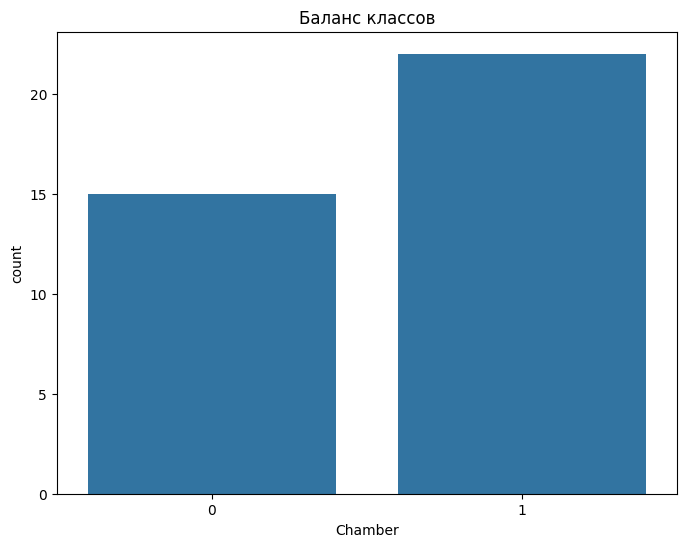

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Chamber', data=df)
plt.title('Баланс классов')
plt.show()

In [ ]:
df.astype(float)

,Cavity,AB,AO,OW,%,Chamber
0,0.3,35.0,40.0,60.0,0.50,0.0
1,0.3,25.0,40.0,50.0,0.50,0.0
2,0.3,27.5,40.0,50.0,0.50,0.0
3,0.3,35.0,35.0,50.0,0.50,1.0
4,0.3,35.0,30.0,50.0,0.50,1.0
5,0.3,35.0,40.0,50.0,0.50,0.0
6,0.3,30.0,40.0,50.0,0.50,0.0
7,0.7,35.0,40.0,50.0,0.10,1.0
8,0.7,35.0,40.0,50.0,0.50,1.0
9,0.7,35.0,40.0,60.0,0.50,0.0


In [ ]:
X = df.drop('Chamber', axis=1)
y = df['Chamber']

In [ ]:
#X = df.drop('Chamber','OW','%','Cavity', axis=1)
X= df[['AB','AO']]
y = df['Chamber']

In [ ]:
X_train0, X_test, y_train0, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)


In [ ]:
from imblearn.over_sampling import SMOTE


over = SMOTE(sampling_strategy={0: 50, 1: 50})
X_train, y_train = over.fit_resample(X_train0, y_train0)


In [ ]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    print(y_pred)
    print(y_test)

    print(f"Оценка модели: {model_name} ")
    print(f"Точность (Accuracy): {accuracy:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC AUC: {auc:.4f}")

    print("Отчет о классификации:")
    print(classification_report(y_test, y_pred))

    # Матрица ошибок
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Матрица ошибок - {model_name}')
    plt.xlabel('Предсказанные метки')
    plt.ylabel('Истинные метки')
    plt.show()

    return {
        'accuracy': accuracy,
        'f1': f1,
        'auc': auc,
        'model': model
    }

In [ ]:
model_params = {
    # Логистическая регрессия
    'Логистическая регрессия': {
        'pipeline': Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', LogisticRegression(class_weight='balanced', random_state=42))
        ]),
        'params': {
                'classifier__C': [0.01, 0.1, 1, 10, 100],
                'classifier__penalty': ['l1', 'l2', 'elasticnet'],
                'classifier__solver': ['saga'],
                'classifier__l1_ratio': [0.2, 0.5, 0.8] # только для elasticnet
            }
    },

    # Random Forest (не требует масштабирования)
    'Random Forest': {
        'pipeline': Pipeline([
            ('classifier', RandomForestClassifier(class_weight='balanced', random_state=42))
        ]),
        'params': {
                'classifier__n_estimators': [5, 10, 15],  # Увеличьте немного количество деревьев
                'classifier__max_depth': [2, 3, 4, 5],    # Уменьшите max_depth (10 и 20 слишком велики для 30 образцов)
                'classifier__min_samples_split': [2, 5],  # Хорошие значения
                'classifier__min_samples_leaf': [1, 2, 4], # Хорошие значения
                'classifier__bootstrap': [True, False]
           }
    },

    # XGBoost (не требует масштабирования)
    'XGBoost': {
        'pipeline': Pipeline([
            ('classifier', XGBClassifier(random_state=42, verbosity=0))
        ]),
        'params': {
                'classifier__n_estimators': [10, 30, 50],           # Значительно уменьшите количество деревьев
                'classifier__learning_rate': [0.01, 0.05, 0.1],     # Хорошие значения
                'classifier__max_depth': [2, 3, 4],                 # Уменьшите максимальную глубину
                'classifier__colsample_bytree': [0.7, 0.9],         # Хорошие значения
                'classifier__gamma': [0, 0.1, 0.2],                 # Хорошие значения
                'classifier__min_child_weight': [1, 3],             # Добавьте этот параметр для контроля переобучения
                'classifier__subsample': [0.7, 0.9],                # Добавьте для случайного подвыбора данных
                'classifier__scale_pos_weight': [1, 5]              # Хорошо для несбалансированных классов
            }
    },

    # LightGBM (не требует масштабирования)
    #'LightGBM': {
        #'pipeline': Pipeline([
            #('scaler', StandardScaler()),
            #('classifier', LGBMClassifier(random_state=42, verbose=-1))
        #]),
        #'params': {
            #'classifier__n_estimators': [200, 300],
            #'classifier__learning_rate': [0.05, 0.1],  # увеличили минимальную скорость
            #'classifier__max_depth': [5, 7],  # увеличили глубину
            #'classifier__min_child_samples': [20, 30],  # уменьшили регуляризацию
            #'classifier__reg_alpha': [0, 0.1],  # L1 регуляризация
            #'classifier__reg_lambda': [0, 0.1],  # L2 регуляризация
#}
    #},
        # CatBoost (не требует масштабирования)
     #'CatBoost': {
         #'pipeline': Pipeline([
             #('classifier', CatBoostClassifier(verbose=0, random_state=42))
         #]),
         #'params': {
              #'classifier__iterations': [10, 30, 50],             # Значительно уменьшите число итераций
              #'classifier__learning_rate': [0.01, 0.05, 0.1],     # Добавьте промежуточное значение
              #'classifier__depth': [2, 3, 4],                     # Уменьшите глубину деревьев
              #'classifier__l2_leaf_reg': [3, 5, 7],               # Хорошие значения для регуляризации
              #'classifier__subsample': [0.7, 0.9],                # Добавьте для случайного подвыбора данных
              #'classifier__rsm': [0.7, 0.9],                      # Случайный подвыбор признаков
              #'classifier__min_data_in_leaf': [1, 2, 3],          # Контроль минимального размера листа
              #'classifier__auto_class_weights': ['Balanced']      # Полезно для несбалансированных классов
     #}
     #},


    # SVM
    'SVM': {
        'pipeline': Pipeline([
            ('scaler', StandardScaler()),
            ('selector', RFE(estimator=SGDClassifier(random_state=42), n_features_to_select=10)),
            ('classifier', SVC(probability=True, random_state=42))
        ]),
        'params': {
            'classifier__C': [0.1, 1, 10],
            'classifier__gamma': ['scale', 'auto', 0.1],
            'classifier__kernel': ['rbf', 'linear', 'poly'],
            'classifier__class_weight': ['balanced', None]
        }
    },

    # Наивный Байес
    'Наивный Байес': {
        'pipeline': Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', GaussianNB())
        ]),
        'params': {
            'classifier__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
        }
    },
}

In [ ]:

def train_and_evaluate_models(X_train, y_train, X_test, y_test, model_params, cv=5, scoring='f1'):
    results = {}
    best_models = {}
    evaluation_results = {}
    feature_importances = {}  # Словарь для хранения важности признаков каждой модели
    feature_names = X_test.columns
    # Обучение и оценка каждой модели
    for model_name, model_info in model_params.items():
        print(f"Настройка модели: {model_name} ")

        # Создаем GridSearchCV для текущей модели
        grid_search = GridSearchCV(
            model_info['pipeline'],
            model_info['params'],
            cv=StratifiedKFold(n_splits=cv, shuffle=True, random_state=42),
            scoring=scoring,
            n_jobs=-1,
            verbose=1
        )

        # Обучаем модель
        grid_search.fit(X_train, y_train)

        # Сохраняем результаты
        results[model_name] = {
            'best_params': grid_search.best_params_,
            'best_score': grid_search.best_score_,
            'model': grid_search.best_estimator_
        }


        best_models[model_name] = grid_search.best_estimator_

        print(f"Лучшие параметры для {model_name}:")
        print(grid_search.best_params_)
        print(f"Лучший {scoring}-score при кросс-валидации: {grid_search.best_score_:.4f}")

        # Оцениваем модель на тестовой выборке
        evaluation_results[model_name] = evaluate_model(
            grid_search.best_estimator_, X_test, y_test, model_name
        )

        # Извлекаем и сохраняем важность признаков


        supermodel=grid_search.best_estimator_.named_steps['classifier']

        if hasattr(supermodel, 'feature_importances_'):

            importances = pd.DataFrame({
                         'feature': feature_names,
                         'importance': supermodel.feature_importances_})

            feature_importances[model_name] = importances.sort_values('importance', ascending=False)

        # Для линейных моделей с коэффициентами
        if hasattr(supermodel, 'coef_'):

            coeffs = supermodel.coef_[0]

            importances = pd.DataFrame({
              'feature': feature_names,
              'importance': np.abs(coeffs)})

            feature_importances[model_name] = importances.sort_values('importance', ascending=False)



    # Создаем ансамбль из лучших моделей (стекинг)
    print("Создаем ансамбль моделей (стекинг)")

    # Выбираем 3 лучшие модели по F1 на валидации
    top_models = sorted(
        [(name, results[name]['best_score']) for name in results.keys()],
        key=lambda x: x[1],
        reverse=True
    )[:3]

    print(f"Топ-3 модели для ансамбля: {[model[0] for model in top_models]}")

    # Создаем ансамбль
    estimators = [(name, best_models[name]) for name, _ in top_models]

    stacking = StackingClassifier(
        estimators=estimators,
        final_estimator=LogisticRegression(),
        cv=5,
        stack_method='predict_proba'
    )

    stacking.fit(X_train, y_train)

    # Оцениваем ансамбль
    evaluation_results['Stacking Ensemble'] = evaluate_model(
        stacking, X_test, y_test, 'Stacking Ensemble'
    )

    # Пытаемся извлечь важность признаков из ансамбля
    # Специально для StackingClassifier# Извлекаем важность признаков из ансамбля

    stack_importances = {}
    for i, estimator in enumerate(stacking.estimators_):
        name = estimators[i][0]
    # Извлекаем классификатор из пайплайна
        if hasattr(estimator, 'named_steps') and 'classifier' in estimator.named_steps:
            base_model = estimator.named_steps['classifier']

        # Для моделей с feature_importances_
            if hasattr(base_model, 'feature_importances_'):
                stack_importances[name] = base_model.feature_importances_

        # Для моделей с coef_
            elif hasattr(base_model, 'coef_'):
                stack_importances[name] = np.abs(base_model.coef_[0])

# Объединяем все важности в один DataFrame
    if stack_importances:

    # Объединяем важности
        combined_importances = pd.DataFrame({'feature': feature_names,**{name: imp for name, imp in stack_importances.items()}})

    # Вычисляем среднюю важность
        combined_importances['importance'] = combined_importances.drop('feature', axis=1).mean(axis=1)

        feature_importances['Stacking Ensemble'] = combined_importances.sort_values('importance', ascending=False)







    # Находим лучшую модель по F1 на тестовой выборке

    best_model_name = max(evaluation_results.items(), key=lambda x: x[1]['f1'])[0]
    best_model = evaluation_results[best_model_name]['model']

    print(f"Лучшая модель: {best_model_name} ")
    print(f"F1-score на тестовой выборке: {evaluation_results[best_model_name]['f1']:.4f}")

    # Визуализация сравнения моделей
    model_names = list(evaluation_results.keys())
    f1_scores = [evaluation_results[model]['f1'] for model in model_names]

    plt.figure(figsize=(12, 6))


    fig = sns.barplot(x=model_names, y=f1_scores)
    plt.title('Сравнение F1-score моделей на тестовой выборке')
    plt.xlabel('Модель')
    plt.ylabel('F1-score')
    plt.xticks(rotation=45, ha='right')
    for i, value in enumerate(f1_scores):
        fig.text(i, value, f'{value:.3f}', ha='center', va='bottom')
    plt.tight_layout()
    plt.show()





    # Сводная визуализация важных признаков всех моделей
    plot_feature_importance_comparison(feature_importances, top_n=10)

    return best_model, best_model_name, evaluation_results, results, best_models






# Функция для сводной визуализации важности признаков
def plot_feature_importance_comparison(feature_importances, top_n=10):
    comparison_data = []

    # Сначала собираем все данные
    for model_name, importance_df in feature_importances.items():
        if importance_df is not None and not importance_df.empty:
            importance_col = 'mean_importance' if 'mean_importance' in importance_df.columns else 'importance'

            top_features = importance_df.nlargest(top_n, importance_col)

            for _, row in top_features.iterrows():
                comparison_data.append({
                    'Модель': model_name,
                    'Признак': row['feature'],
                    'Важность': row[importance_col] if importance_col in row else row['importance']
                })

    # Создаем DataFrame и стандартизуем важность
    comparison_df = pd.DataFrame(comparison_data)

    # Нормализуем важность для каждой модели (0-1)
    comparison_df['Нормализованная важность'] = comparison_df.groupby('Модель')['Важность'].transform(
        lambda x: (x - x.min()) / (x.max() - x.min())
    )

    # Визуализация с нормализованной важностью
    plt.figure(figsize=(15, 10))
    sns.barplot(x='Признак', y='Нормализованная важность', hue='Модель',
                data=comparison_df, palette='viridis')
    plt.title(f'Сравнение нормализованной важности признаков')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Модель', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # Тепловая карта с нормализованными значениями
    plt.figure(figsize=(16, 12))
    pivot_df = comparison_df.pivot(index='Признак', columns='Модель',
                                 values='Нормализованная важность').fillna(0)
    sns.heatmap(pivot_df, annot=True, cmap='YlGnBu', fmt='.2f',
               cbar_kws={'label': 'Нормализованная важность'})
    plt.title('Тепловая карта нормализованной важности признаков')
    plt.tight_layout()
    plt.show()

    # Вывод таблицы с нормализованными значениями
    print("\nТоп-5 важных признаков для каждой модели (нормализованные значения):")
    for model_name in comparison_df['Модель'].unique():
        print(f"\n{model_name}:")
        model_data = comparison_df[comparison_df['Модель'] == model_name].head(5)
        for _, row in model_data.iterrows():
            print(f"  {row['Признак']}: {row['Нормализованная важность']:.4f}")

Настройка модели: Логистическая регрессия 
Fitting 5 folds for each of 45 candidates, totalling 225 fits
Лучшие параметры для Логистическая регрессия:
{'classifier__C': 1, 'classifier__l1_ratio': 0.8, 'classifier__penalty': 'elasticnet', 'classifier__solver': 'saga'}
Лучший f1-score при кросс-валидации: 0.9799
[1 1 1 1 1 1 0 0 0 1]
7     1
15    1
11    1
33    1
20    1
4     1
27    0
12    0
22    0
5     0
Name: Chamber, dtype: int64
Оценка модели: Логистическая регрессия 
Точность (Accuracy): 0.9000
F1-score: 0.9231
ROC AUC: 1.0000
Отчет о классификации:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



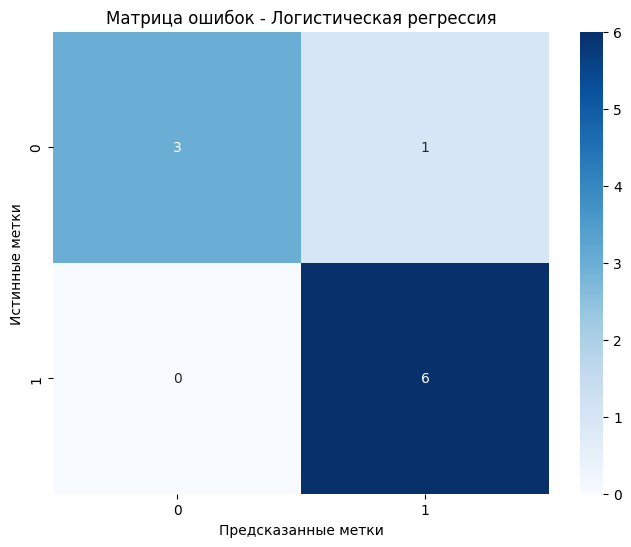

Настройка модели: Random Forest 
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Лучшие параметры для Random Forest:
{'classifier__bootstrap': True, 'classifier__max_depth': 3, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 15}
Лучший f1-score при кросс-валидации: 0.9905
[1 1 1 1 1 0 0 0 0 0]
7     1
15    1
11    1
33    1
20    1
4     1
27    0
12    0
22    0
5     0
Name: Chamber, dtype: int64
Оценка модели: Random Forest 
Точность (Accuracy): 0.9000
F1-score: 0.9091
ROC AUC: 1.0000
Отчет о классификации:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.83      0.91         6

    accuracy                           0.90        10
   macro avg       0.90      0.92      0.90        10
weighted avg       0.92      0.90      0.90        10



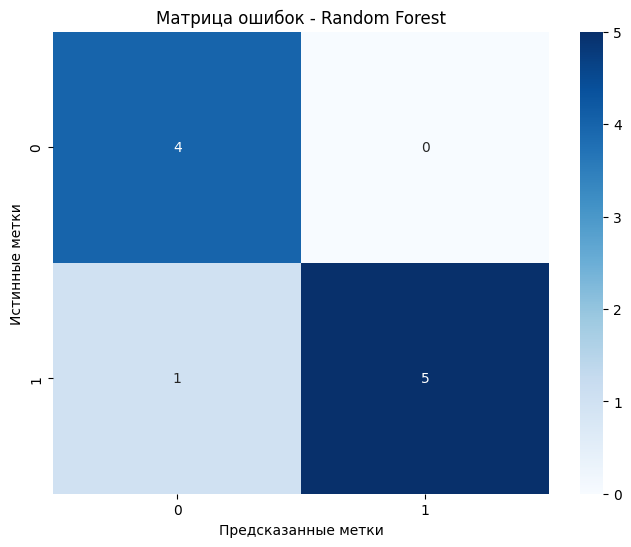

Настройка модели: XGBoost 
Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
Лучшие параметры для XGBoost:
{'classifier__colsample_bytree': 0.7, 'classifier__gamma': 0, 'classifier__learning_rate': 0.05, 'classifier__max_depth': 2, 'classifier__min_child_weight': 1, 'classifier__n_estimators': 50, 'classifier__scale_pos_weight': 1, 'classifier__subsample': 0.9}
Лучший f1-score при кросс-валидации: 0.9501
[1 1 1 1 1 1 0 0 0 1]
7     1
15    1
11    1
33    1
20    1
4     1
27    0
12    0
22    0
5     0
Name: Chamber, dtype: int64
Оценка модели: XGBoost 
Точность (Accuracy): 0.9000
F1-score: 0.9231
ROC AUC: 1.0000
Отчет о классификации:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



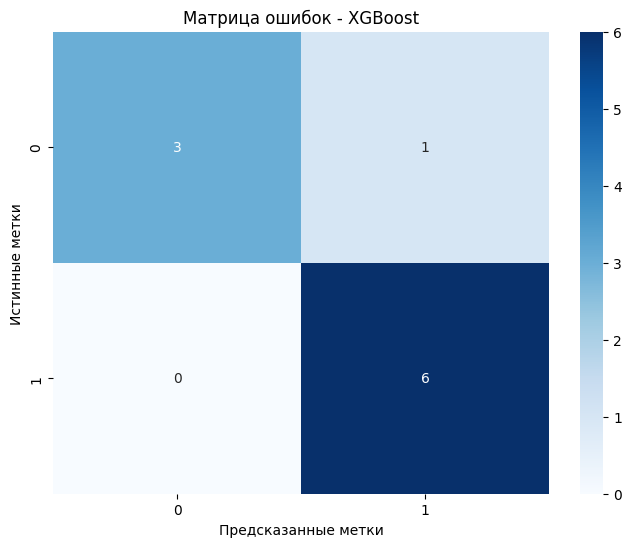

Настройка модели: SVM 
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Лучшие параметры для SVM:
{'classifier__C': 1, 'classifier__class_weight': 'balanced', 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}
Лучший f1-score при кросс-валидации: 0.9895
[1 1 1 1 1 1 0 0 0 1]
7     1
15    1
11    1
33    1
20    1
4     1
27    0
12    0
22    0
5     0
Name: Chamber, dtype: int64
Оценка модели: SVM 
Точность (Accuracy): 0.9000
F1-score: 0.9231
ROC AUC: 1.0000
Отчет о классификации:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=10 > n_features=5. There will be no feature selection and all features will be kept.
  warnings.warn(


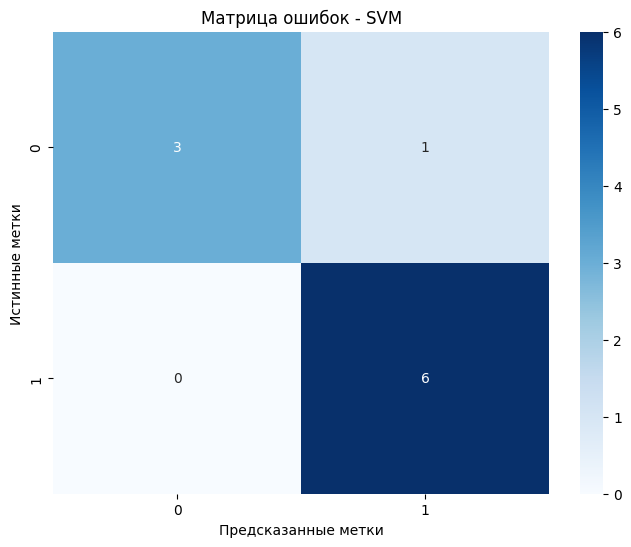

Настройка модели: Наивный Байес 
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Лучшие параметры для Наивный Байес:
{'classifier__var_smoothing': 1e-09}
Лучший f1-score при кросс-валидации: 0.9567
[1 1 1 0 1 1 0 0 0 0]
7     1
15    1
11    1
33    1
20    1
4     1
27    0
12    0
22    0
5     0
Name: Chamber, dtype: int64
Оценка модели: Наивный Байес 
Точность (Accuracy): 0.9000
F1-score: 0.9091
ROC AUC: 1.0000
Отчет о классификации:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.83      0.91         6

    accuracy                           0.90        10
   macro avg       0.90      0.92      0.90        10
weighted avg       0.92      0.90      0.90        10



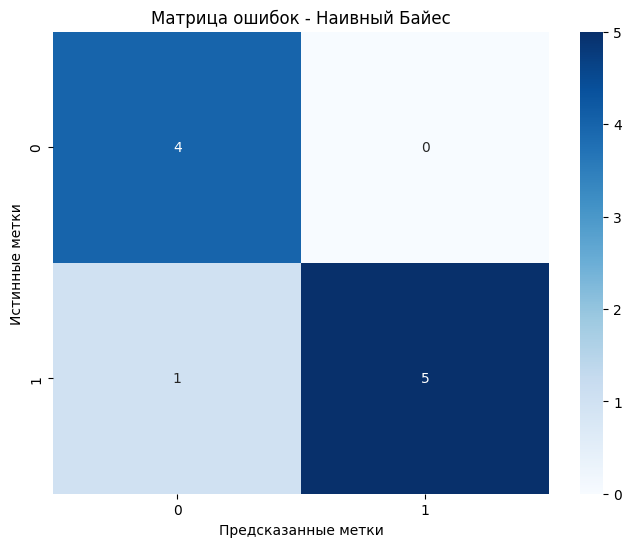

Создаем ансамбль моделей (стекинг)
Топ-3 модели для ансамбля: ['Random Forest', 'SVM', 'Логистическая регрессия']


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=10 > n_features=5. There will be no feature selection and all features will be kept.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=10 > n_features=5. There will be no feature selection and all features will be kept.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=10 > n_features=5. There will be no feature selection and all features will be kept.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=10 > n_features=5. There will be no feature selection and all features will be kept.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_sele

[1 1 1 1 1 1 0 0 0 1]
7     1
15    1
11    1
33    1
20    1
4     1
27    0
12    0
22    0
5     0
Name: Chamber, dtype: int64
Оценка модели: Stacking Ensemble 
Точность (Accuracy): 0.9000
F1-score: 0.9231
ROC AUC: 1.0000
Отчет о классификации:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



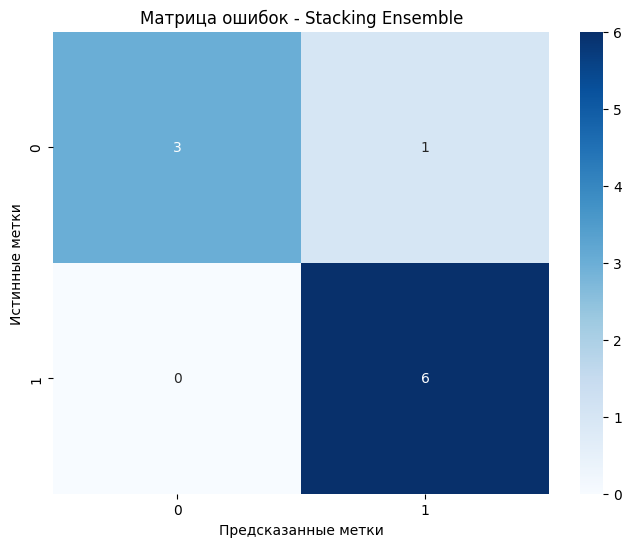

Лучшая модель: Логистическая регрессия 
F1-score на тестовой выборке: 0.9231


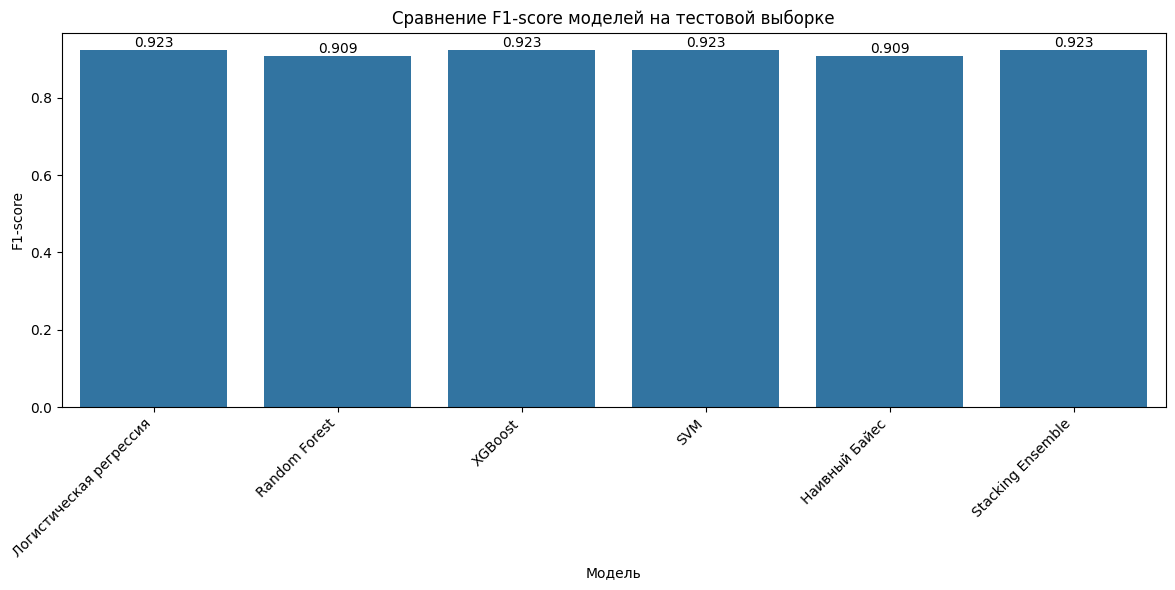

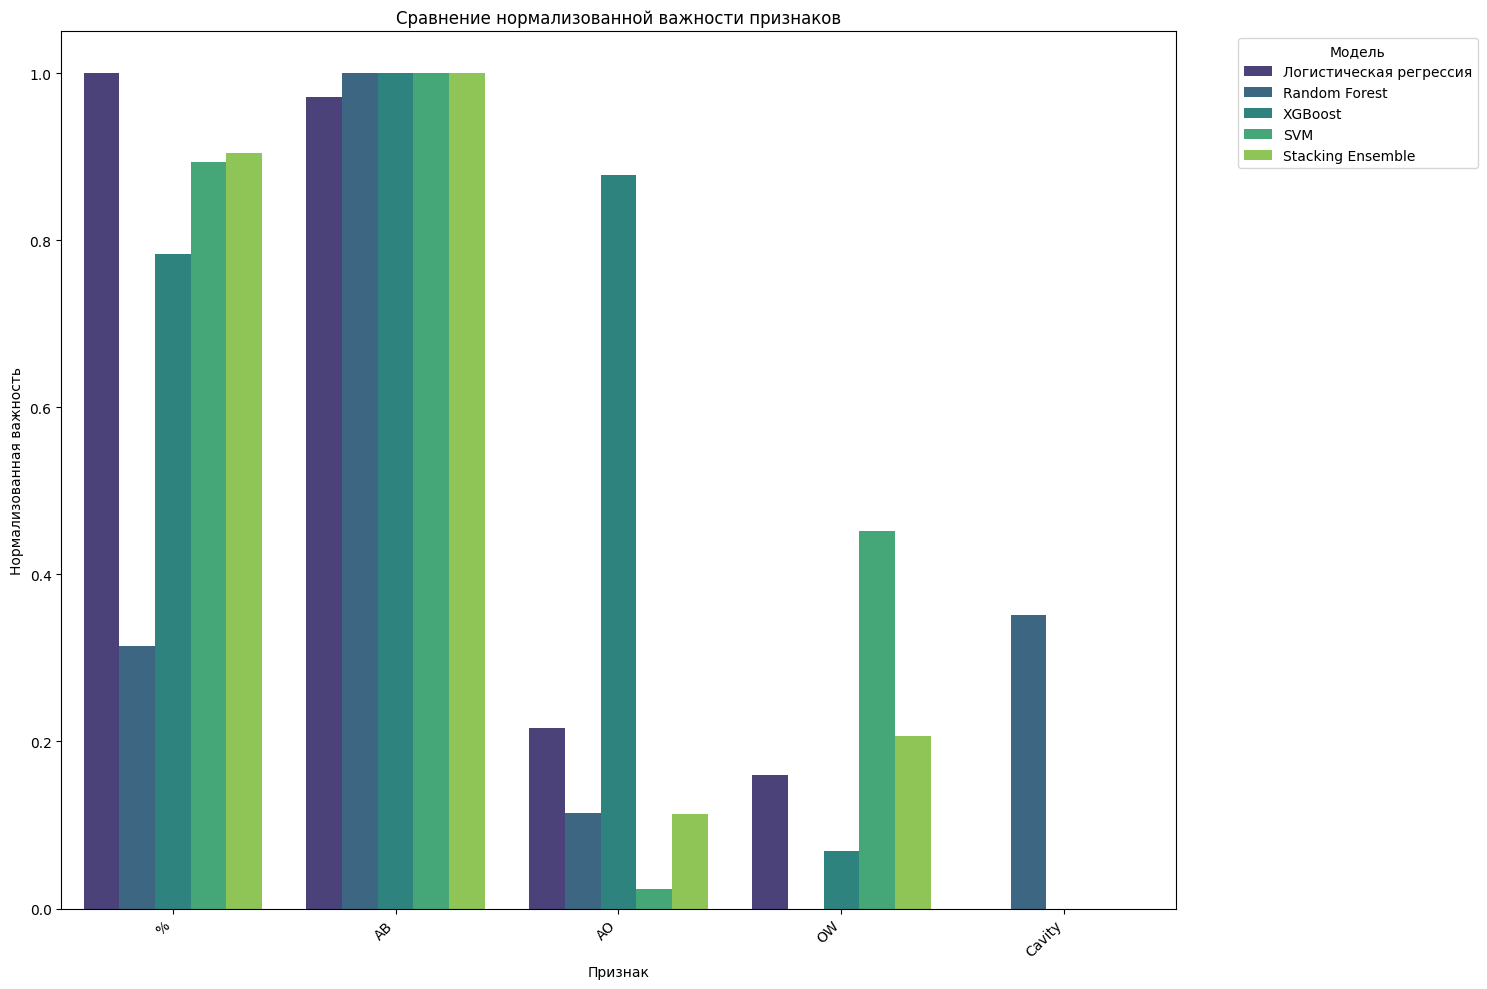

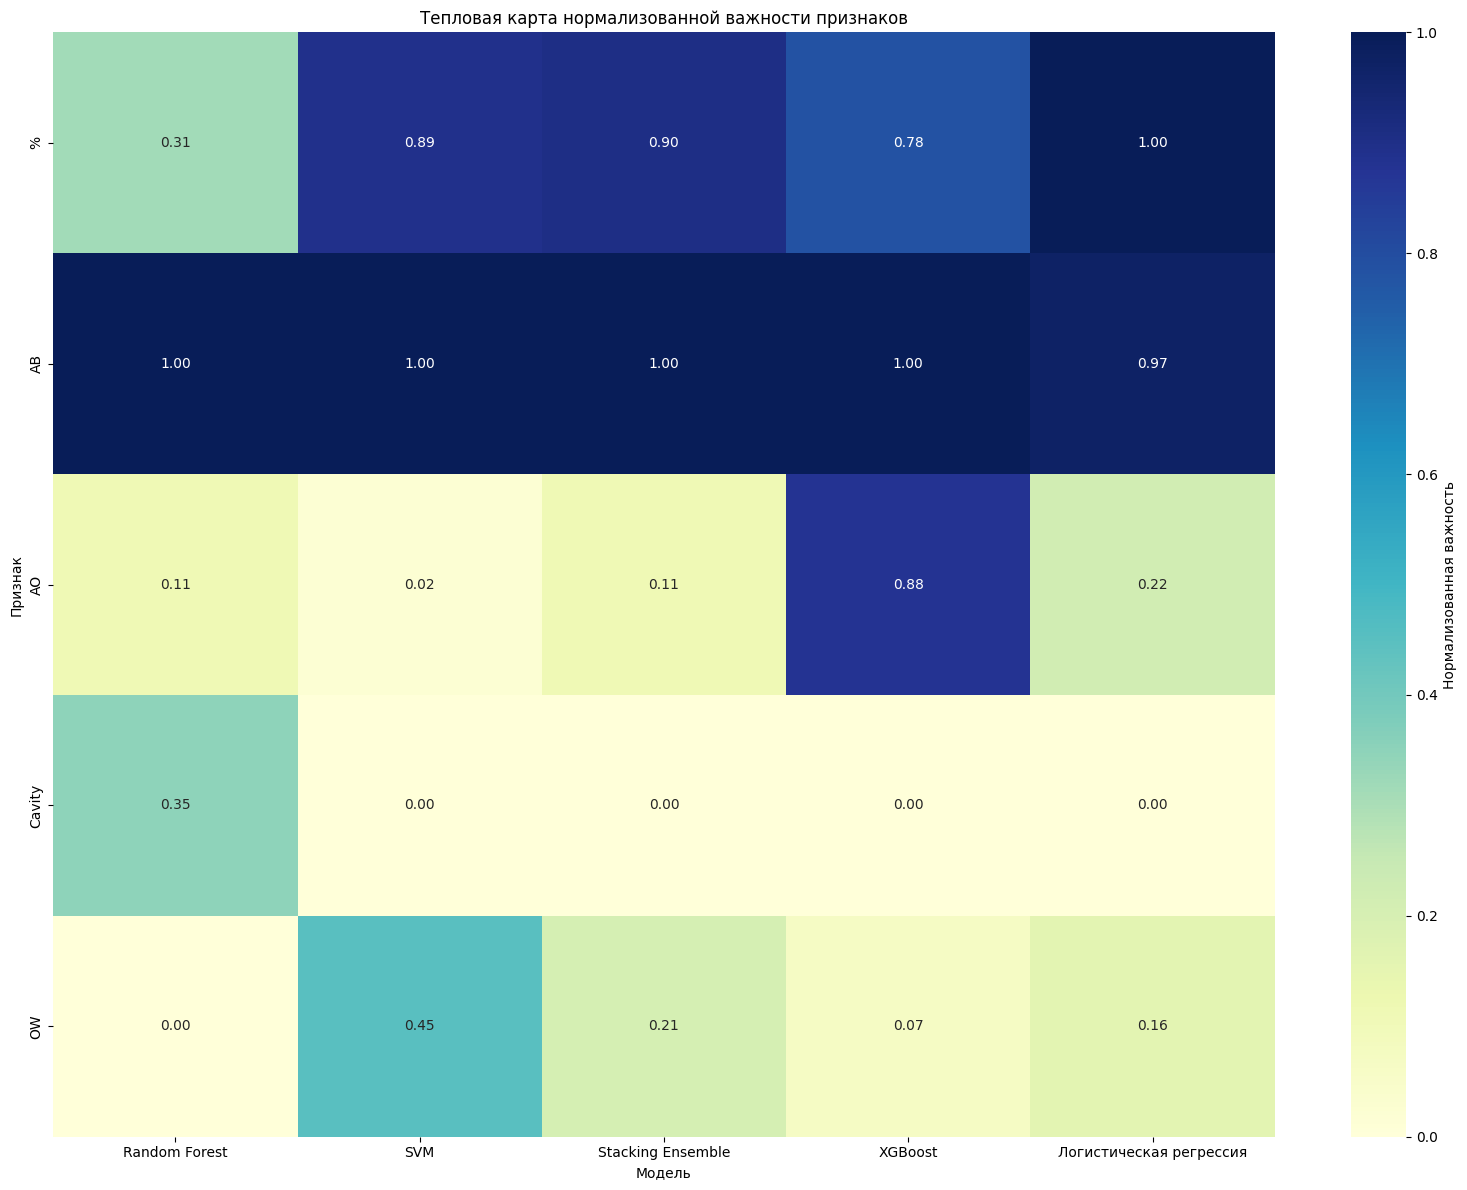


Топ-5 важных признаков для каждой модели (нормализованные значения):

Логистическая регрессия:
  %: 1.0000
  AB: 0.9715
  AO: 0.2156
  OW: 0.1601
  Cavity: 0.0000

Random Forest:
  AB: 1.0000
  Cavity: 0.3510
  %: 0.3144
  AO: 0.1140
  OW: 0.0000

XGBoost:
  AB: 1.0000
  AO: 0.8777
  %: 0.7840
  OW: 0.0691
  Cavity: 0.0000

SVM:
  AB: 1.0000
  %: 0.8931
  OW: 0.4525
  AO: 0.0234
  Cavity: 0.0000

Stacking Ensemble:
  AB: 1.0000
  %: 0.9044
  OW: 0.2061
  AO: 0.1137
  Cavity: 0.0000


In [ ]:

best_model, best_model_name, evaluation_results, results, best_models = train_and_evaluate_models(
    X_train, y_train, X_test, y_test, model_params
)


In [ ]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    print(f"\nОценка модели: {model_name}")
    print(f"Точность (Accuracy): {accuracy:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC AUC: {auc:.4f}")

    print("\nОтчет о классификации:")
    print(classification_report(y_test, y_pred))

    # Матрица ошибок
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Матрица ошибок - {model_name}')
    plt.xlabel('Предсказанные метки')
    plt.ylabel('Истинные метки')
    plt.show()

    return {
        'accuracy': accuracy,
        'f1': f1,
        'auc': auc,
        'model': model
    }

In [ ]:
# Конфигурация моделей для Optuna
model_params = {
    'Логистическая регрессия': {
        'pipeline': Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000))
        ]),
        'params': {
            'classifier__C': {'type': 'float', 'low': 0.01, 'high': 100, 'log': True},
            'classifier__penalty': {'type': 'categorical', 'values': ['l1', 'l2', 'elasticnet']},
            'classifier__solver': {'type': 'categorical', 'values': ['saga']},
            'classifier__l1_ratio': {'type': 'float', 'low': 0.2, 'high': 0.8}
        }
    },
    'Random Forest': {
        'pipeline': Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', RandomForestClassifier(class_weight='balanced', random_state=42))
        ]),
        'params': {
            'classifier__n_estimators': {'type': 'int', 'low': 2, 'high': 10},
            'classifier__max_depth': {'type': 'int', 'low': 2, 'high': 5},
            'classifier__min_samples_split': {'type': 'int', 'low': 2, 'high': 5},
            'classifier__min_samples_leaf': {'type': 'int', 'low': 2, 'high': 4},
            'classifier__bootstrap': {'type': 'categorical', 'values': [True, False]}
        }
    },
    'XGBoost': {
        'pipeline': Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', XGBClassifier(random_state=42, verbosity=0))
        ]),
        'params': {
            'classifier__n_estimators': {'type': 'int', 'low': 10, 'high': 50},
            'classifier__learning_rate': {'type': 'float', 'low': 0.01, 'high': 0.1},
            'classifier__max_depth': {'type': 'int', 'low': 2, 'high': 4},
            'classifier__colsample_bytree': {'type': 'float', 'low': 0.6, 'high': 1.0},
            'classifier__gamma': {'type': 'float', 'low': 0, 'high': 0.2},
            'classifier__min_child_weight': {'type': 'int', 'low': 1, 'high': 3},
            'classifier__subsample': {'type': 'float', 'low': 0.6, 'high': 1.0},
            'classifier__scale_pos_weight': {'type': 'int', 'low': 1, 'high': 5}
        }
    },

    'SVM': {
        'pipeline': Pipeline([
            ('scaler', StandardScaler()),
            ('selector', RFE(estimator=LogisticRegression(), n_features_to_select=10)),
            ('classifier', SVC(probability=True, random_state=42))
        ]),
        'params': {
            'classifier__C': {'type': 'float', 'low': 0.1, 'high': 10, 'log': True},
            'classifier__gamma': {'type': 'categorical', 'values': ['scale', 'auto', 0.1]},
            'classifier__kernel': {'type': 'categorical', 'values': ['rbf', 'linear']},
            'classifier__class_weight': {'type': 'categorical', 'values': ['balanced', None]}
        }
    },
    'Наивный Байес': {
        'pipeline': Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', GaussianNB())
        ]),
        'params': {
            'classifier__var_smoothing': {'type': 'float', 'low': 1e-10, 'high': 1e-5, 'log': True}
        }
    },
}

In [ ]:
# Функция для оптимизации с Optuna
def objective(trial, pipeline, param_space, X, y, cv, scoring):
    params = {}
    for param_name, param_config in param_space.items():
        if param_config['type'] == 'categorical':
            params[param_name] = trial.suggest_categorical(param_name, param_config['values'])
        elif param_config['type'] == 'float':
            params[param_name] = trial.suggest_float(
                param_name, param_config['low'], param_config['high'], log=param_config.get('log', False))
        elif param_config['type'] == 'int':
            params[param_name] = trial.suggest_int(
                param_name, param_config['low'], param_config['high'])

        # Установка параметров в пайплайн
    pipeline.set_params(**params)

        # Кросс-валидация
    cv_scores = cross_val_score(pipeline, X, y, cv=cv, scoring=scoring, n_jobs=-1)
    return np.mean(cv_scores)

In [ ]:

def plot_decision_boundary_for_best_model(best_model, X,y, title="Decision Boundary"):

    #Визуализирует границы решений лучшей модели в пространстве двух главных компонент PCA

    # Инициализация PCA перед использованием
    pca = PCA(n_components=2)
    scaler = StandardScaler()

    # Масштабирование и преобразование данных
    X_scaled = scaler.fit_transform(X)
    X_pca = pca.fit_transform(X_scaled)

    # Создание сетки для визуализации
    x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
    y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Предсказание для каждой точки сетки
    Z = best_model.predict(scaler.inverse_transform(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()])))
    Z = Z.reshape(xx.shape)

    # Визуализация
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=20, edgecolor='k', cmap='viridis')
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(label='Class')
    plt.grid(alpha=0.3)
    for i in range(len(X_pca)):
        plt.annotate(f"Point {i}", (X_pca[i, 0], X_pca[i, 1]))
    plt.show()

    return pca

In [ ]:
# Функция для сводной визуализации важности признаков
def plot_feature_importance_comparison(feature_importances, top_n=5):
    comparison_data = []

    # Сначала собираем все данные
    for model_name, importance_df in feature_importances.items():
        if importance_df is not None and not importance_df.empty:
            importance_col = 'mean_importance' if 'mean_importance' in importance_df.columns else 'importance'

            top_features = importance_df.nlargest(top_n, importance_col)

            for _, row in top_features.iterrows():
                comparison_data.append({
                    'Модель': model_name,
                    'Признак': row['feature'],
                    'Важность': row[importance_col] if importance_col in row else row['importance']
                })

    # Создаем DataFrame и стандартизуем важность
    comparison_df = pd.DataFrame(comparison_data)

    # Нормализуем важность для каждой модели (0-1)
    comparison_df['Нормализованная важность'] = comparison_df.groupby('Модель')['Важность'].transform(
        lambda x: (x - x.min()) / (x.max() - x.min())
    )

    # Визуализация с нормализованной важностью
    plt.figure(figsize=(15, 10))
    sns.barplot(x='Признак', y='Нормализованная важность', hue='Модель',
                data=comparison_df, palette='viridis')
    plt.title(f'Сравнение нормализованной важности признаков')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Модель', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # Тепловая карта с нормализованными значениями
    plt.figure(figsize=(16, 12))
    pivot_df = comparison_df.pivot(index='Признак', columns='Модель',
                                 values='Нормализованная важность').fillna(0)
    sns.heatmap(pivot_df, annot=True, cmap='YlGnBu', fmt='.2f',
               cbar_kws={'label': 'Нормализованная важность'})
    plt.title('Тепловая карта нормализованной важности признаков')
    plt.tight_layout()
    plt.show()

    # Вывод таблицы с нормализованными значениями
    print("\nТоп-5 важных признаков для каждой модели (нормализованные значения):")
    for model_name in comparison_df['Модель'].unique():
        print(f"\n{model_name}:")
        model_data = comparison_df[comparison_df['Модель'] == model_name].head(5)
        for _, row in model_data.iterrows():
            print(f"  {row['Признак']}: {row['Нормализованная важность']:.4f}")

In [ ]:
def train_and_evaluate_models(X_train, y_train, X_test, y_test, X, y, X_train0, y_train0, model_params, cv=5, scoring='f1', n_trials=50):
    results = {}
    best_models = {}
    evaluation_results = {}
    feature_importances = {}  # Словарь для хранения важности признаков каждой модели
    feature_names = X_train.columns.tolist()
    from optuna.logging import set_verbosity
    set_verbosity(optuna.logging.ERROR)
    warnings.filterwarnings('ignore')


    # Обучение и оценка каждой модели с Optuna
    for model_name, model_info in model_params.items():
        print(f"\n{'='*50}")
        print(f"Оптимизация модели: {model_name} с помощью Optuna")
        print(f"{'='*50}")

        study = optuna.create_study(
            direction='maximize',
            sampler=TPESampler(seed=42))

        study.optimize(
            lambda trial: objective(
                trial,
                model_info['pipeline'],
                model_info['params'],
                X_train,
                y_train,
                StratifiedKFold(n_splits=cv, shuffle=True, random_state=42),
                scoring
            ),
            n_trials=n_trials,
            show_progress_bar=True
        )

        # Лучшие параметры
        best_params = study.best_params
        best_model = model_info['pipeline'].set_params(**best_params)
        best_model.fit(X_train, y_train)

        # Сохраняем результаты
        results[model_name] = {
            'best_params': best_params,
            'best_score': study.best_value,
            'model': best_model
        }

        best_models[model_name] = best_model
        print(f"\nЛучшие параметры для {model_name}:")
        for param, value in best_params.items():
            print(f"{param}: {value}")
        print(f"Лучший {scoring}-score: {study.best_value:.4f}")




        # Оценка на тестовой выборке
        evaluation_results[model_name] = evaluate_model(
            best_model, X_test, y_test, model_name
        )

        classifier = best_model.named_steps['classifier']
        # Извлекаем и сохраняем важность признаков
        if hasattr(classifier, 'feature_importances_'):

            importances = pd.DataFrame({
                         'feature': feature_names,
                         'importance': classifier.feature_importances_})

            feature_importances[model_name] = importances.sort_values('importance', ascending=False)

        # Для линейных моделей с коэффициентами
        if hasattr(classifier, 'coef_'):

            coeffs = classifier.coef_[0]

            importances = pd.DataFrame({
              'feature': feature_names,
              'importance': np.abs(coeffs)})

            feature_importances[model_name] = importances.sort_values('importance', ascending=False)

        if hasattr(classifier, 'theta_'):

            diff = np.abs(classifier.theta_[1] - classifier.theta_[0])
            importances = pd.DataFrame({
                'feature': feature_names,
                'importance': diff / np.max(diff)  # Нормализация
            })
            feature_importances[model_name] = importances.sort_values('importance', ascending=False)

        # Для нелинейных ядер используем permutation importance

        elif isinstance(classifier, SVC):
        # Масштабируем данные, если в пайплайне есть scaler

            X_test_scaled = best_model.named_steps['scaler'].transform(X_test)
            result = permutation_importance(
                classifier, X_test_scaled, y_test,
                n_repeats=10,
                random_state=42,
                n_jobs=-1)

            importances = pd.DataFrame({
                'feature': feature_names,
                'importance': result.importances_mean})
            feature_importances[model_name] = importances.sort_values('importance', ascending=False)


    # Создание ансамбля из лучших моделей
    print("\nСоздаем ансамбль моделей (стекинг)")
    top_models = sorted(
        [(name, results[name]['best_score']) for name in results.keys()],
        key=lambda x: x[1],
        reverse=True
    )[:3]

    top_model_names = [model[0] for model in top_models]
    print(f"Топ-3 модели для ансамбля: {top_model_names}")

    estimators = [(name, best_models[name]) for name in top_model_names]

    stacking = StackingClassifier(
        estimators=estimators,
        final_estimator=LogisticRegression(),
        cv=5,
        stack_method='predict_proba'
    )

    stacking.fit(X_train, y_train)
    evaluation_results['Stacking Ensemble'] = evaluate_model(
        stacking, X_test, y_test, 'Stacking Ensemble'
    )


    best_models['Stacking Ensemble'] = stacking

    # Пытаемся извлечь важность признаков из ансамбля
    # Специально для StackingClassifier# Извлекаем важность признаков из ансамбля

    stack_importances = {}
    for i, estimator in enumerate(stacking.estimators_):
        name = estimators[i][0]
    # Извлекаем классификатор из пайплайна
        if hasattr(estimator, 'named_steps') and 'classifier' in estimator.named_steps:
            base_model = estimator.named_steps['classifier']

        # Для моделей с feature_importances_
            if hasattr(base_model, 'feature_importances_'):
                stack_importances[name] = base_model.feature_importances_

        # Для моделей с coef_
            elif hasattr(base_model, 'coef_'):
                stack_importances[name] = np.abs(base_model.coef_[0])

    # Объединяем все важности в один DataFrame
    if stack_importances:

        # Объединяем важности
        combined_importances = pd.DataFrame({'feature': feature_names,**{name: imp for name, imp in stack_importances.items()}})

        # Вычисляем среднюю важность
        combined_importances['importance'] = combined_importances.drop('feature', axis=1).mean(axis=1)

        feature_importances['Stacking Ensemble'] = combined_importances.sort_values('importance', ascending=False)



    # Визуализация для всех моделей
    pca_results = {}
    print("\nВизуализация границ принятия решений с помощью PCA:")
    for model_name in list(best_models.keys()):
        print(f"\nВизуализация для модели: {model_name}")
        pca = plot_decision_boundary_for_best_model(best_models[model_name], X, y)



    # Нахождение лучшей модели evaluation_results.items()
    best_model_name = max(evaluation_results.items(), key=lambda x: x[1]['f1'])[0]
    best_model = best_models[best_model_name]

    print(f"\n{'='*50}")
    print(f"Лучшая модель: {best_model_name}")
    print(f"F1-score: {evaluation_results[best_model_name]['f1']:.4f}")
    print(f"{'='*50}")

      # Сравнение моделей
    model_names = list(evaluation_results.keys())
    f1_scores = [evaluation_results[model]['f1'] for model in model_names]

    plt.figure(figsize=(12, 8))
    ax = sns.barplot(x=model_names, y=f1_scores, palette='viridis')
    plt.title('Сравнение F1-score моделей на тестовой выборке')
    plt.xlabel('Модель')
    plt.ylabel('F1-score')
    plt.xticks(rotation=45, ha='right')

    for i, score in enumerate(f1_scores):
        ax.text(i, score + 0.01, f'{score:.3f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()


    # Сравнение моделей
    model_names = list(results.keys())
    f1_scores = [results[model]['best_score'] for model in model_names]

    plt.figure(figsize=(12, 8))
    ax = sns.barplot(x=model_names, y=f1_scores, palette='viridis')
    plt.title('Сравнение F1-score моделей при кросс-валидации')
    plt.xlabel('Модель')
    plt.ylabel('F1-score')
    plt.xticks(rotation=45, ha='right')

    for i, score in enumerate(f1_scores):
        ax.text(i, score + 0.01, f'{score:.3f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()



    # После получения результатов обучения
    pca = plot_decision_boundary_for_best_model(best_model,X,y)

    # Сводная визуализация важных признаков всех моделей
    plot_feature_importance_comparison(feature_importances, top_n=5)

    return {
        'best_model': best_model,
        'best_model_name': best_model_name,
        'evaluation_results': evaluation_results,
        'all_models': best_models
    }


Оптимизация модели: Логистическая регрессия с помощью Optuna


  0%|          | 0/200 [00:00<?, ?it/s]


Лучшие параметры для Логистическая регрессия:
classifier__C: 0.31489116479568624
classifier__penalty: l1
classifier__solver: saga
classifier__l1_ratio: 0.29361118426546196
Лучший f1-score: 0.9895

Оценка модели: Логистическая регрессия
Точность (Accuracy): 0.9000
F1-score: 0.9231
ROC AUC: 1.0000

Отчет о классификации:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



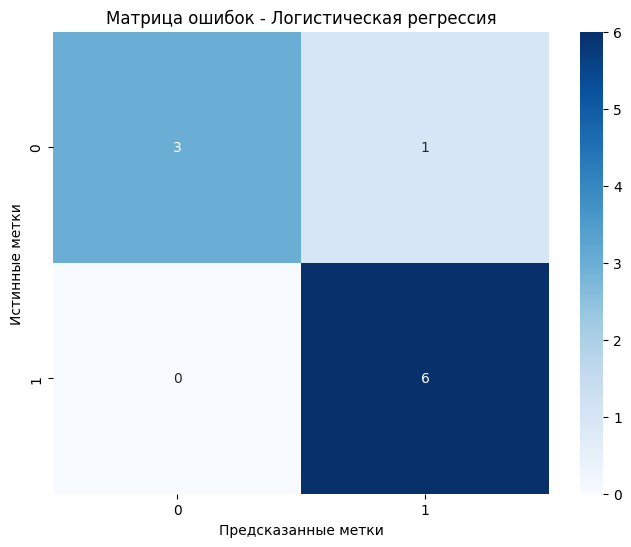


Оптимизация модели: Random Forest с помощью Optuna


  0%|          | 0/200 [00:00<?, ?it/s]


Лучшие параметры для Random Forest:
classifier__n_estimators: 9
classifier__max_depth: 4
classifier__min_samples_split: 3
classifier__min_samples_leaf: 2
classifier__bootstrap: False
Лучший f1-score: 0.9895

Оценка модели: Random Forest
Точность (Accuracy): 0.9000
F1-score: 0.9231
ROC AUC: 1.0000

Отчет о классификации:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



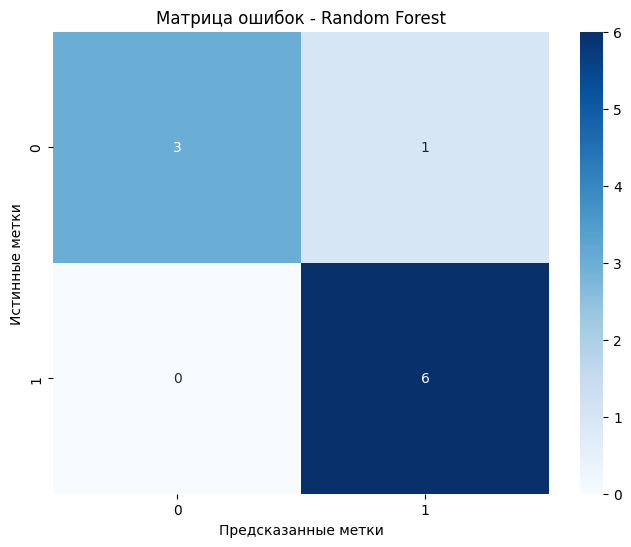


Оптимизация модели: XGBoost с помощью Optuna


  0%|          | 0/200 [00:00<?, ?it/s]


Лучшие параметры для XGBoost:
classifier__n_estimators: 10
classifier__learning_rate: 0.08339152856093508
classifier__max_depth: 4
classifier__colsample_bytree: 0.8916028672163949
classifier__gamma: 0.15425406933718916
classifier__min_child_weight: 1
classifier__subsample: 0.7433862914177091
classifier__scale_pos_weight: 1
Лучший f1-score: 0.9905

Оценка модели: XGBoost
Точность (Accuracy): 0.9000
F1-score: 0.9231
ROC AUC: 1.0000

Отчет о классификации:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



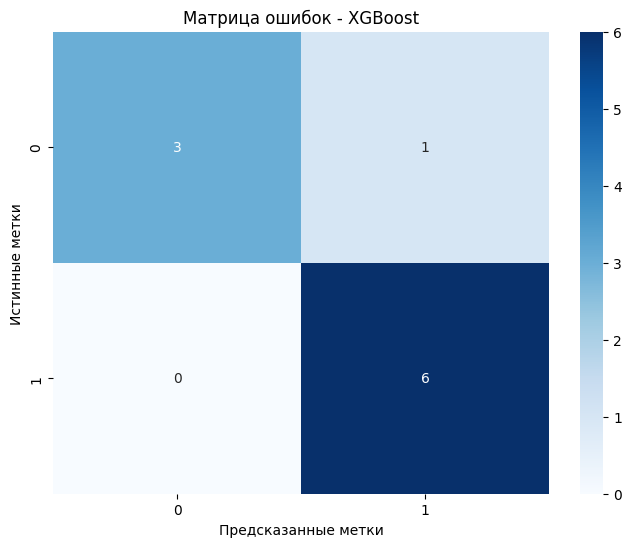


Оптимизация модели: SVM с помощью Optuna


  0%|          | 0/200 [00:00<?, ?it/s]


Лучшие параметры для SVM:
classifier__C: 0.5611516415334505
classifier__gamma: scale
classifier__kernel: rbf
classifier__class_weight: None
Лучший f1-score: 0.9895

Оценка модели: SVM
Точность (Accuracy): 1.0000
F1-score: 1.0000
ROC AUC: 1.0000

Отчет о классификации:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



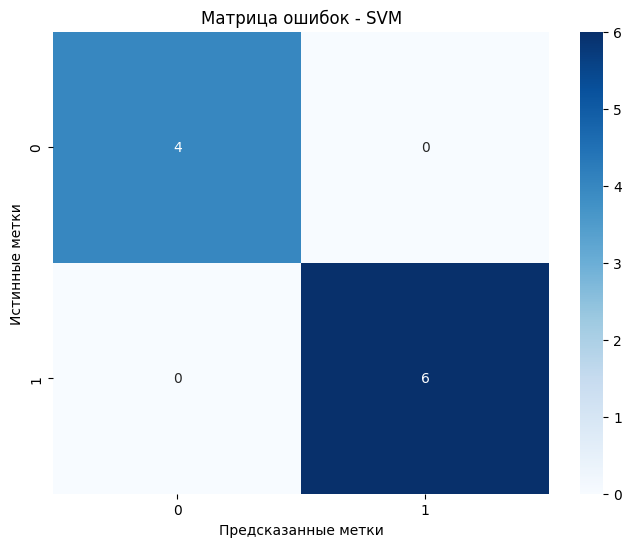


Оптимизация модели: Наивный Байес с помощью Optuna


  0%|          | 0/200 [00:00<?, ?it/s]


Лучшие параметры для Наивный Байес:
classifier__var_smoothing: 7.459343285726553e-09
Лучший f1-score: 0.9345

Оценка модели: Наивный Байес
Точность (Accuracy): 0.9000
F1-score: 0.9091
ROC AUC: 1.0000

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.83      0.91         6

    accuracy                           0.90        10
   macro avg       0.90      0.92      0.90        10
weighted avg       0.92      0.90      0.90        10



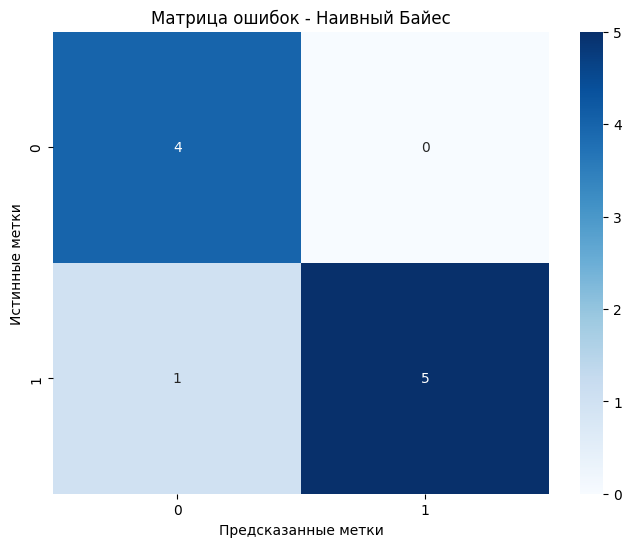


Создаем ансамбль моделей (стекинг)
Топ-3 модели для ансамбля: ['XGBoost', 'Логистическая регрессия', 'Random Forest']

Оценка модели: Stacking Ensemble
Точность (Accuracy): 0.9000
F1-score: 0.9231
ROC AUC: 1.0000

Отчет о классификации:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



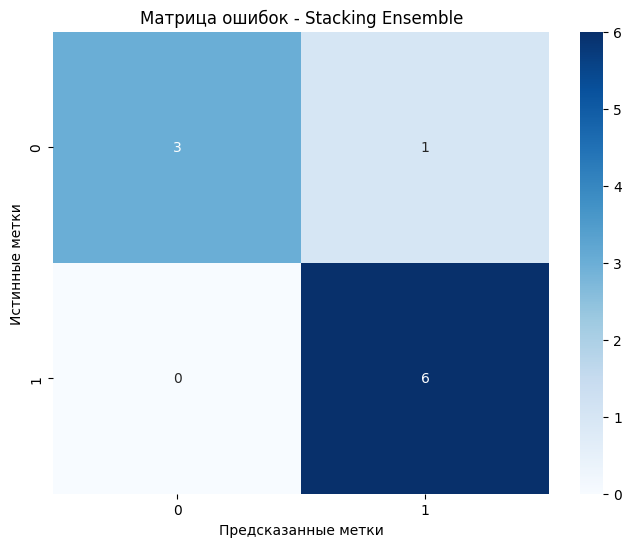


Визуализация границ принятия решений с помощью PCA:

Визуализация для модели: Логистическая регрессия


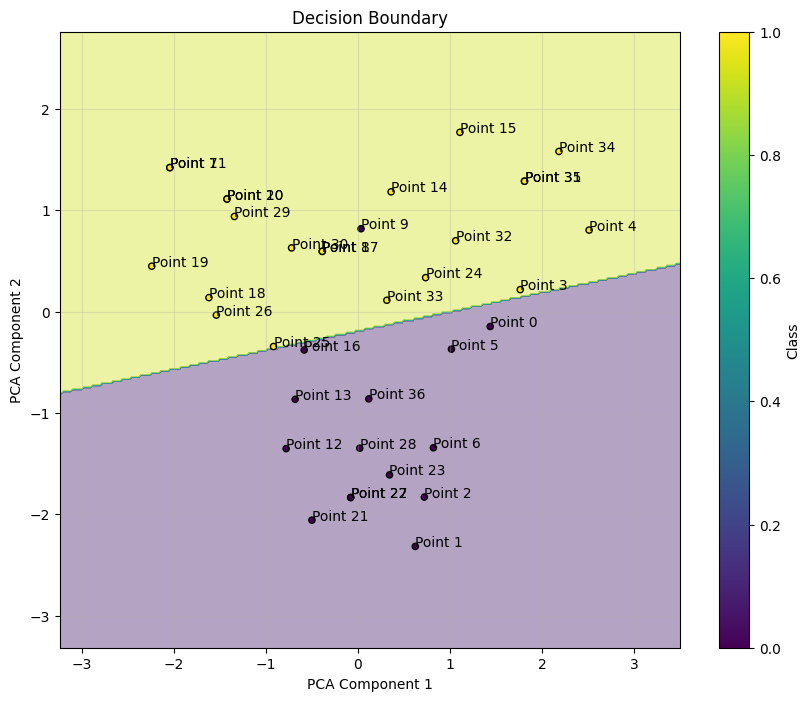


Визуализация для модели: Random Forest


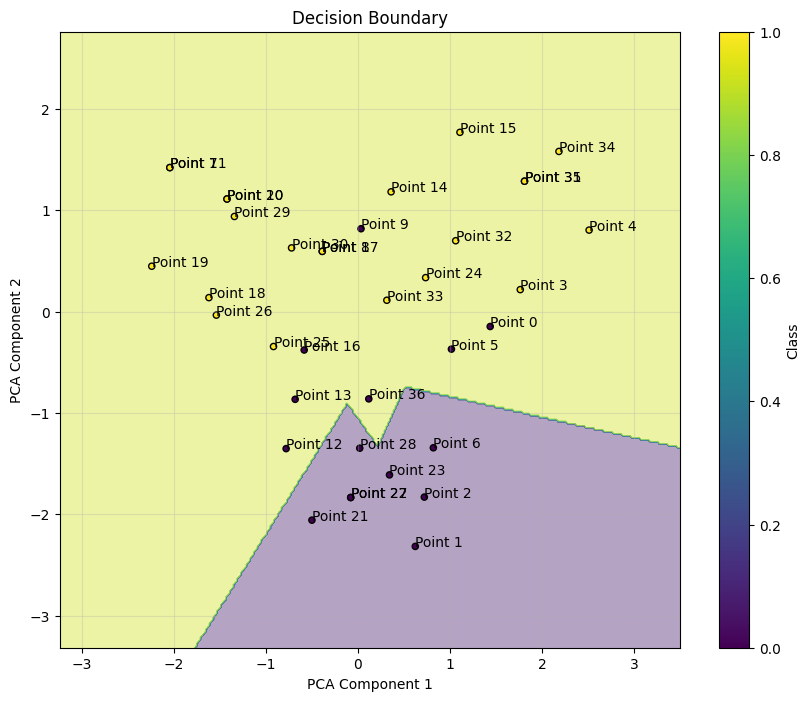


Визуализация для модели: XGBoost


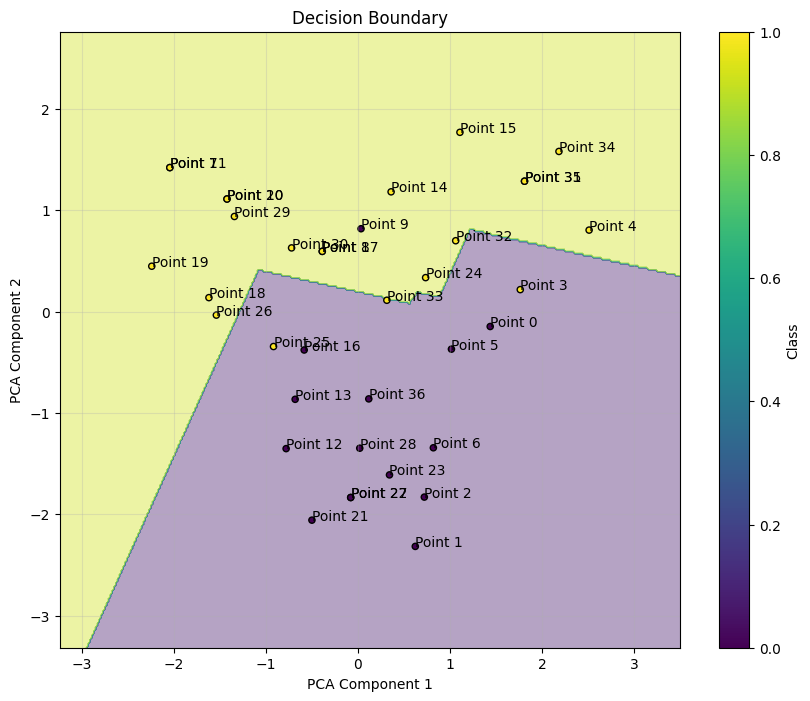


Визуализация для модели: SVM


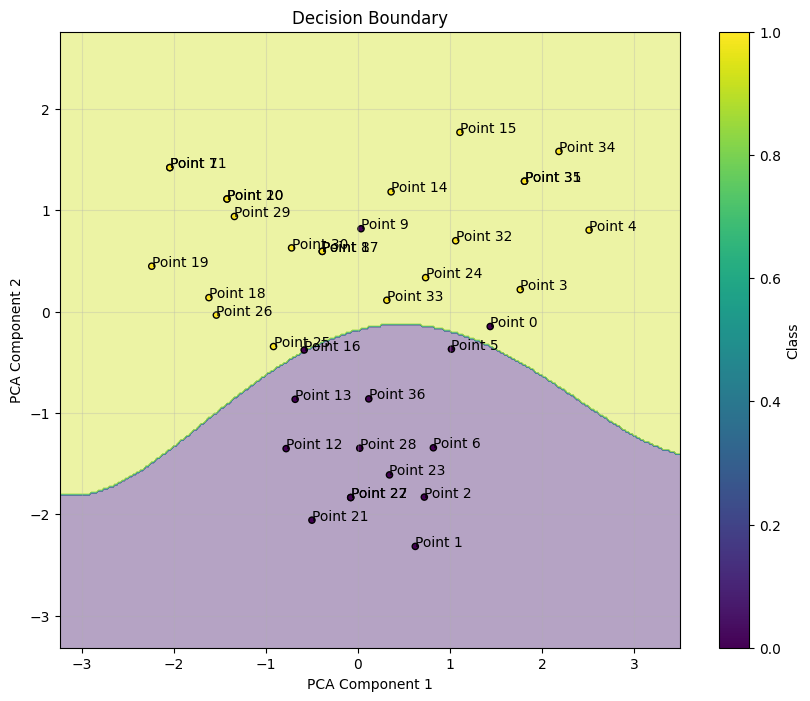


Визуализация для модели: Наивный Байес


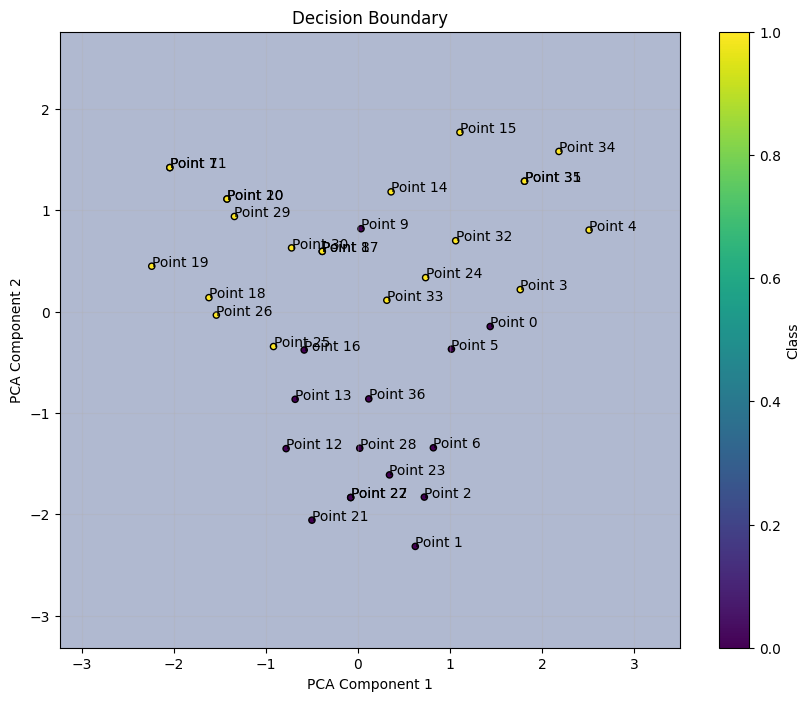


Визуализация для модели: Stacking Ensemble


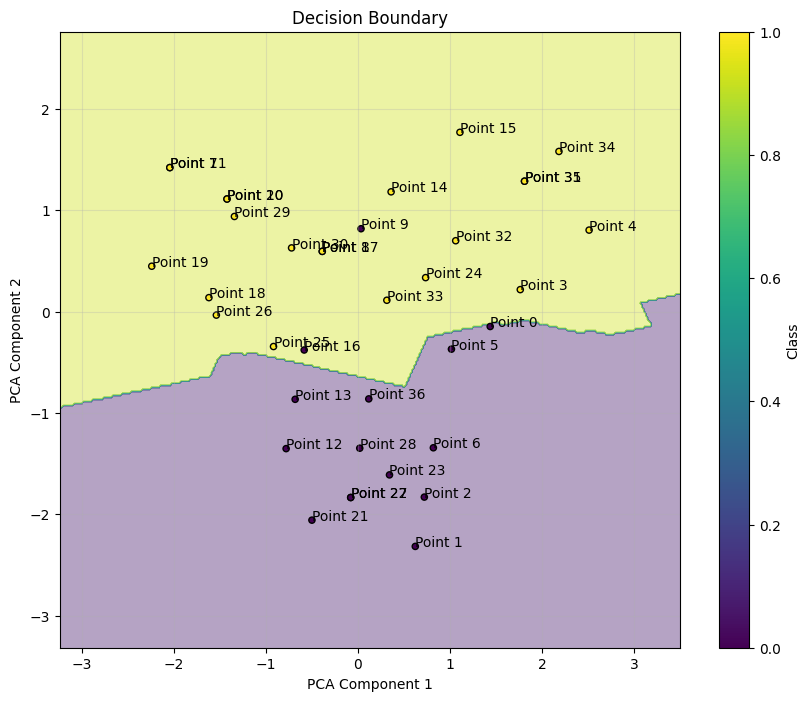


Лучшая модель: SVM
F1-score: 1.0000


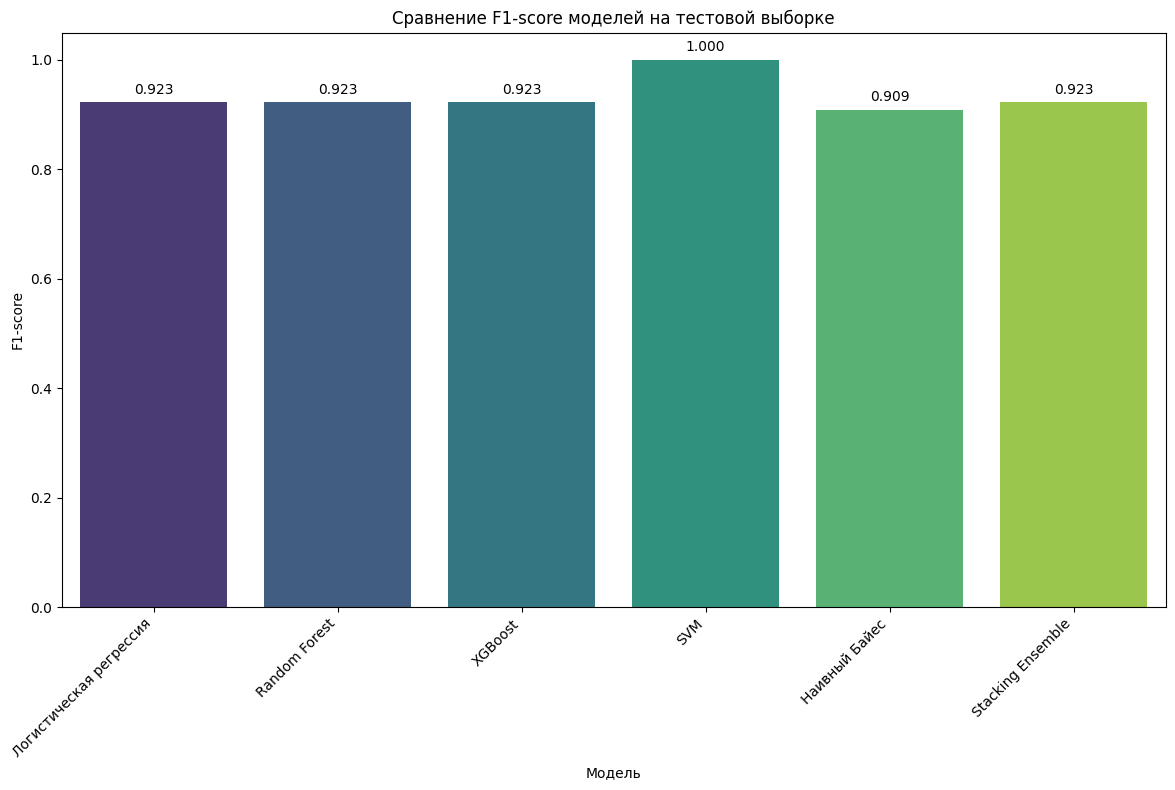

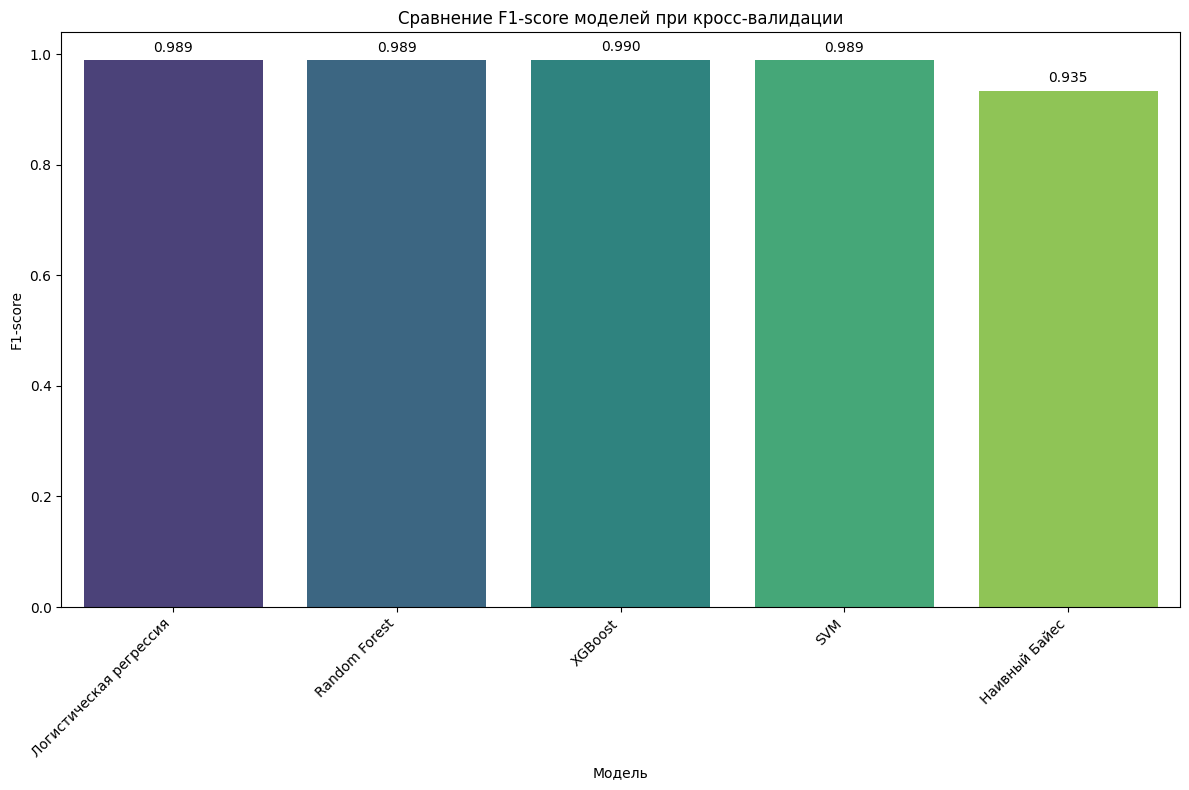

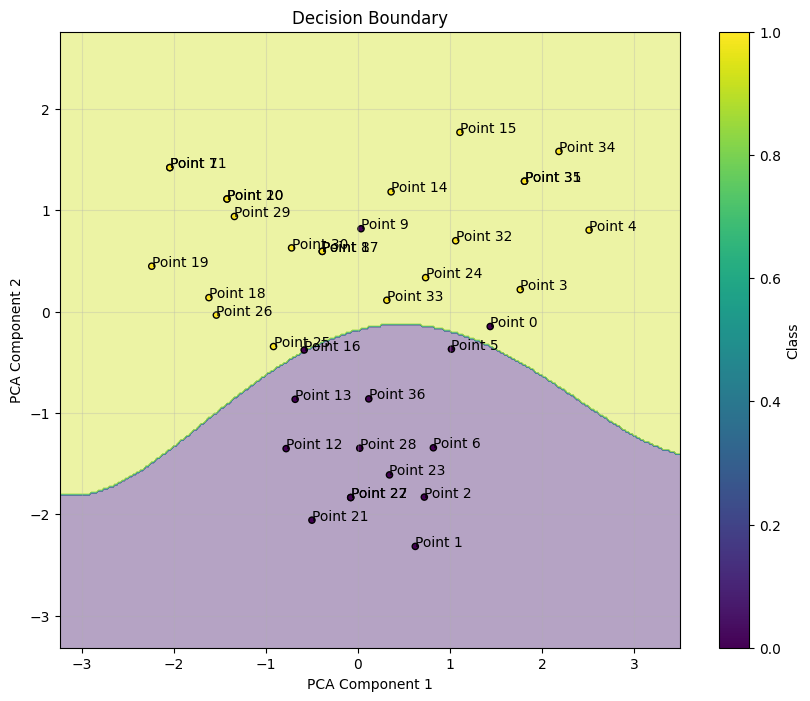

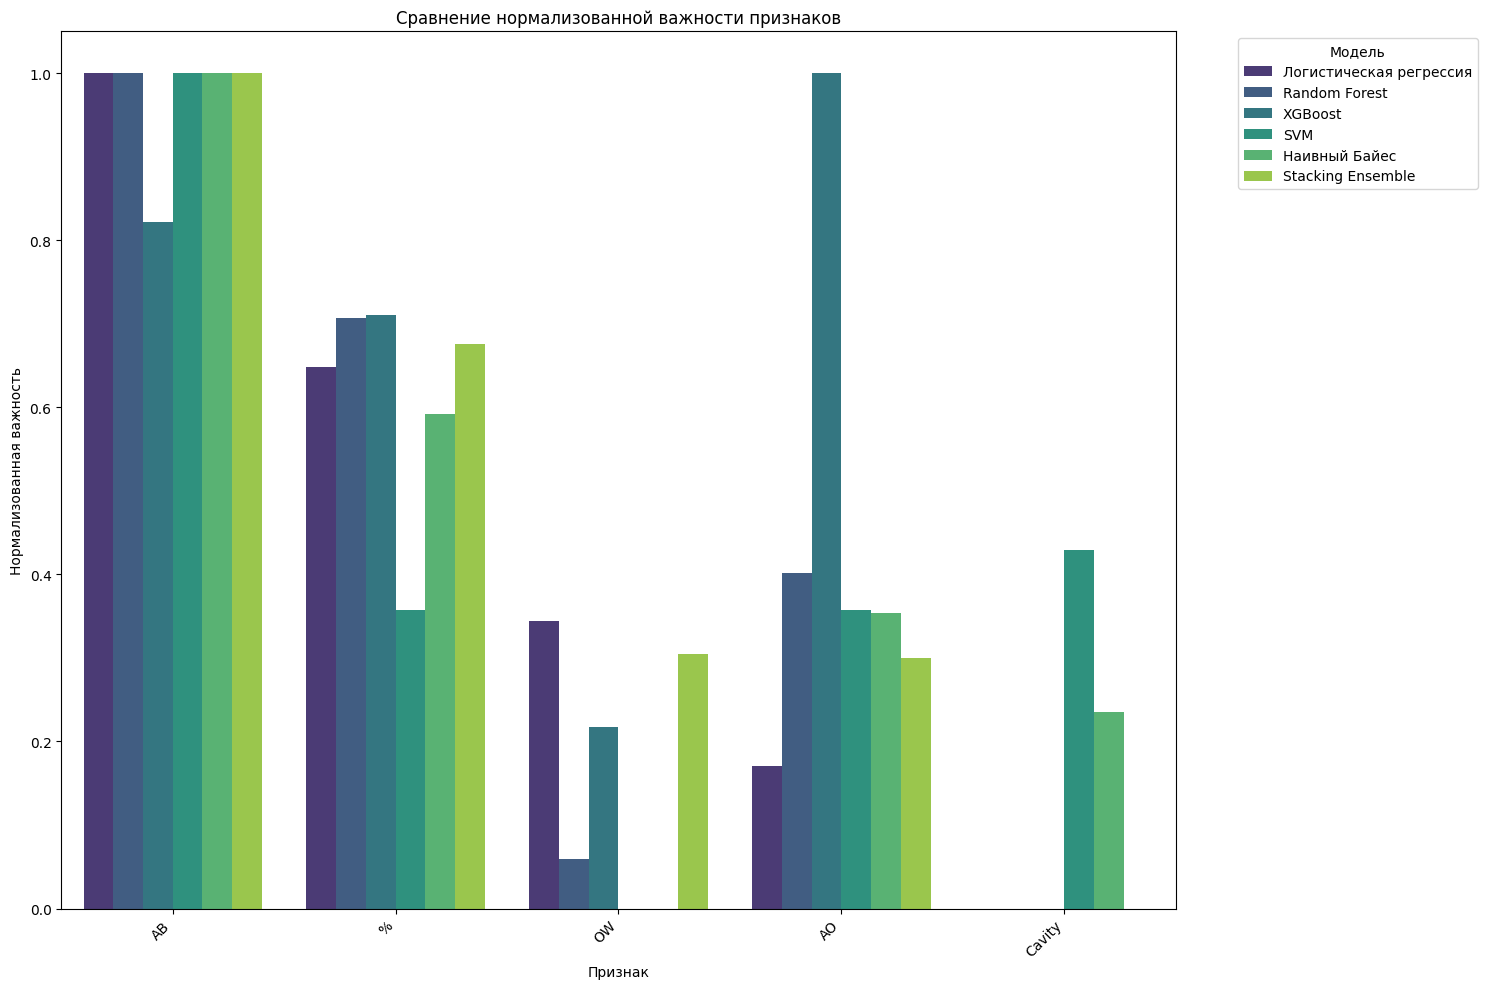

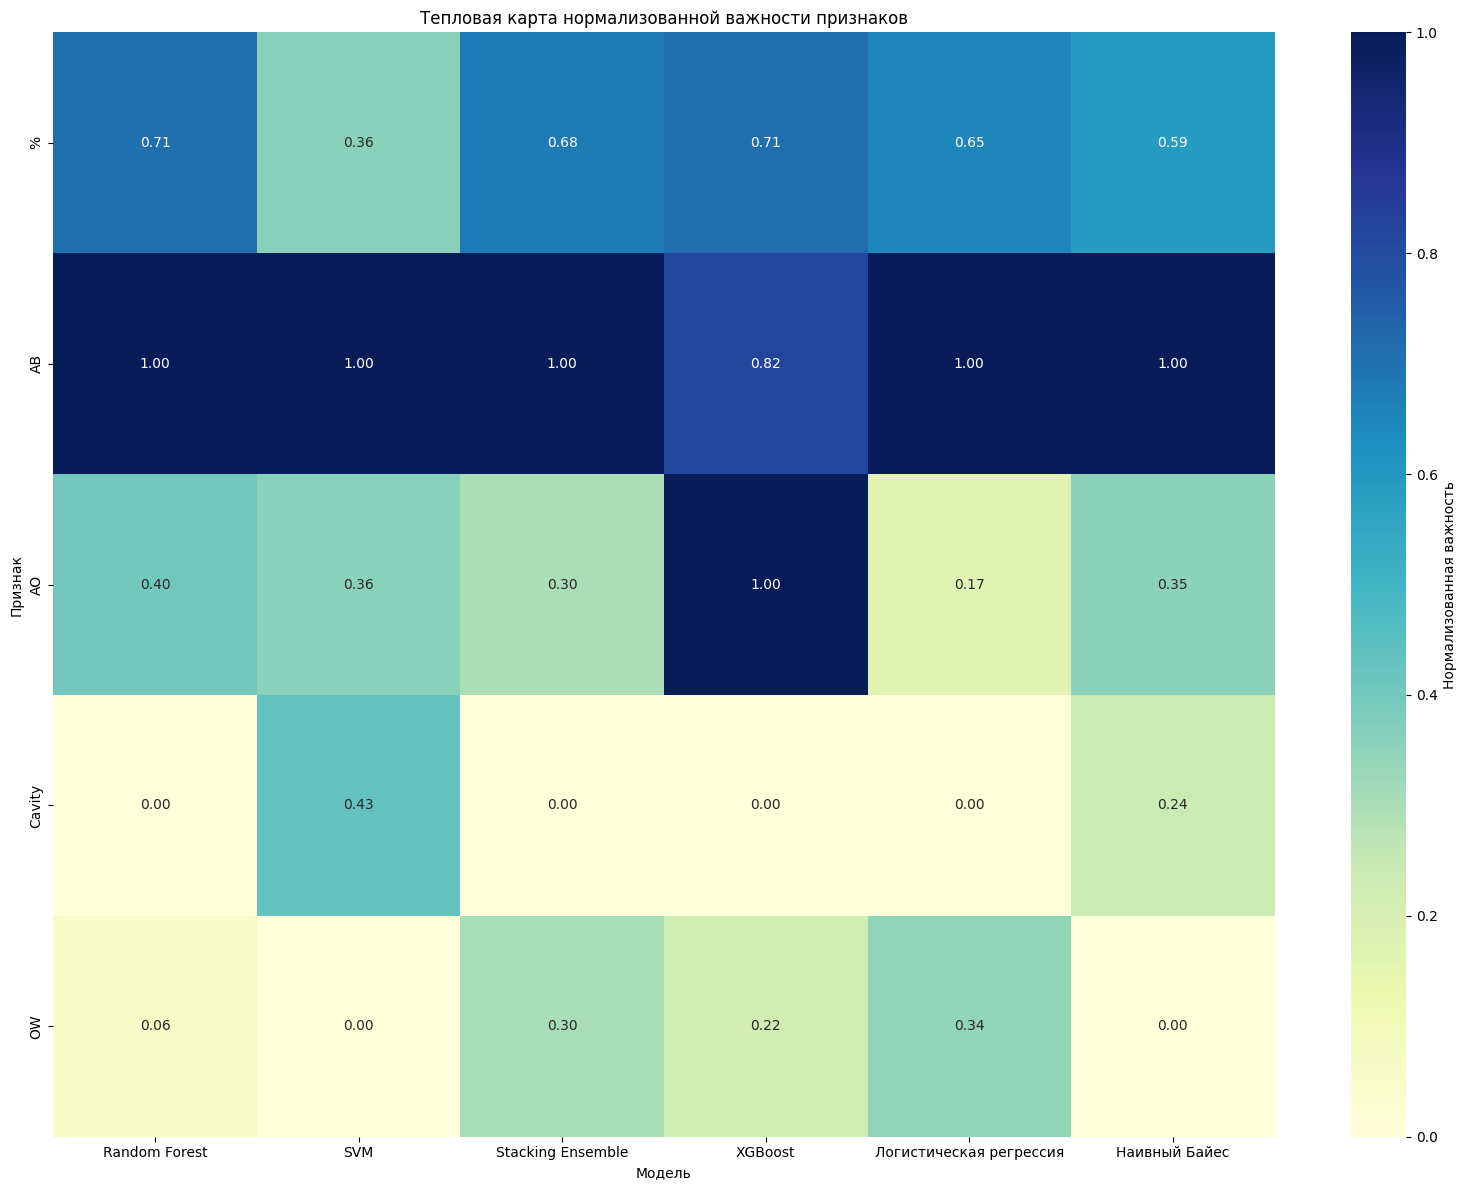


Топ-5 важных признаков для каждой модели (нормализованные значения):

Логистическая регрессия:
  AB: 1.0000
  %: 0.6486
  OW: 0.3440
  AO: 0.1707
  Cavity: 0.0000

Random Forest:
  AB: 1.0000
  %: 0.7068
  AO: 0.4015
  OW: 0.0595
  Cavity: 0.0000

XGBoost:
  AO: 1.0000
  AB: 0.8224
  %: 0.7102
  OW: 0.2173
  Cavity: 0.0000

SVM:
  AB: 1.0000
  Cavity: 0.4286
  AO: 0.3571
  %: 0.3571
  OW: 0.0000

Наивный Байес:
  AB: 1.0000
  %: 0.5922
  AO: 0.3533
  Cavity: 0.2358
  OW: 0.0000

Stacking Ensemble:
  AB: 1.0000
  %: 0.6763
  OW: 0.3042
  AO: 0.2994
  Cavity: 0.0000


In [ ]:
results = train_and_evaluate_models(
    X_train, y_train, X_test, y_test,
    X, y, X_train0, y_train0,  # Полный набор данных
    model_params,
    cv=5,
    scoring='f1',
    n_trials=200
)

In [ ]:
best_model=results['best_model'].named_steps['classifier']

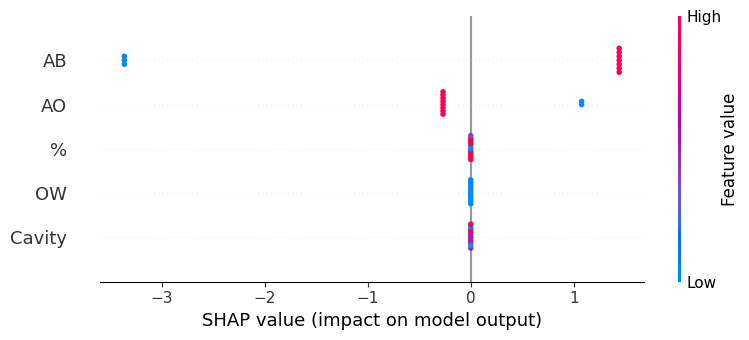

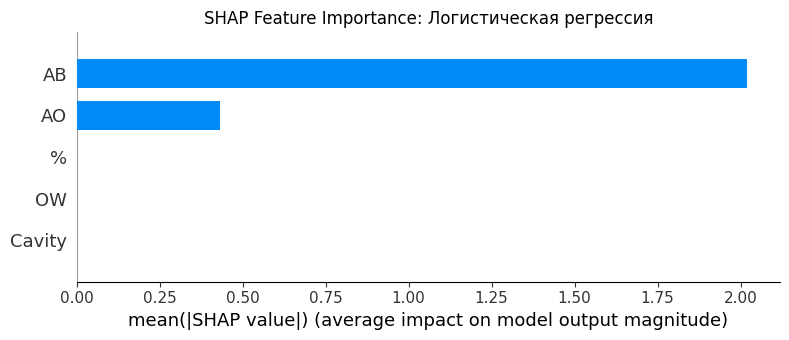

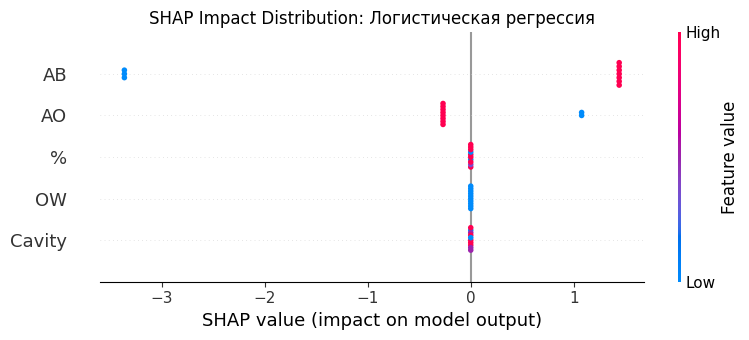

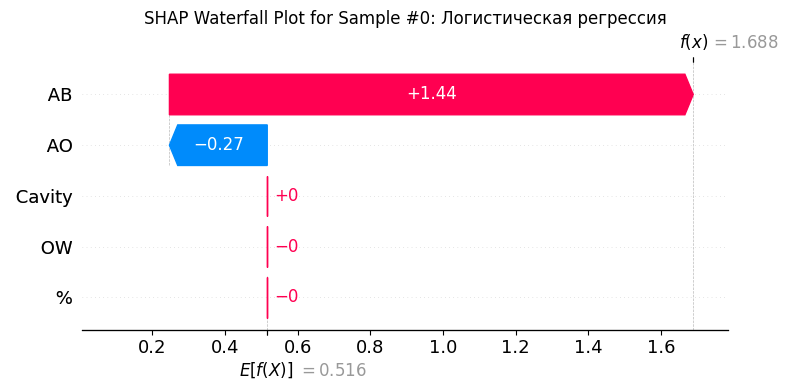

In [ ]:

model = best_model.fit(X, y)
feature_names = X_test.columns.tolist()
# Инициализация объяснителя
explainer = shap.LinearExplainer(model, X_test)
shap_values = explainer.shap_values(X_test)

# Визуализация
shap.summary_plot(shap_values, X_test, class_names=explainer.expected_value)



def explain_with_shap(model, X_test, feature_names, model_name):

    # Проверяем, является ли модель пайплайном
    if isinstance(model, Pipeline):
        # Извлекаем препроцессор и классификатор
        preprocessor = model.named_steps['scaler']
        classifier = model.named_steps['classifier']
        X_test_transformed = preprocessor.transform(X_test)
    else:
        classifier = model
        X_test_transformed = X_test.values if isinstance(X_test, pd.DataFrame) else X_test

    # Инициализируем SHAP-объяснитель в зависимости от типа модели
    if hasattr(classifier, 'feature_importances_') or hasattr(classifier, 'tree_'):
        explainer = shap.TreeExplainer(classifier)
    elif hasattr(classifier, 'coef_'):
        explainer = shap.LinearExplainer(classifier, X_test_transformed)
    else:
        # KernelExplainer для остальных моделей
        explainer = shap.KernelExplainer(classifier.predict_proba, shap.kmeans(X_test_transformed, 10))

    # Вычисляем SHAP-значения
    shap_values = explainer.shap_values(X_test_transformed)

    # Для бинарной классификации берем значения для положительного класса
    if isinstance(shap_values, list) and len(shap_values) == 2:
        shap_values = shap_values[1]

    # Визуализация 1: Summary Plot (глобальная интерпретация)
    plt.figure(figsize=(10, 8))
    shap.summary_plot(shap_values, X_test_transformed, feature_names=feature_names, plot_type="bar", show=False)
    plt.title(f"SHAP Feature Importance: {model_name}")
    plt.tight_layout()
    plt.show()

    # Визуализация 2: Beeswarm Plot
    plt.figure(figsize=(10, 8))
    shap.summary_plot(shap_values, X_test_transformed, feature_names=feature_names, show=False)
    plt.title(f"SHAP Impact Distribution: {model_name}")
    plt.tight_layout()
    plt.show()

    # Визуализация 3: Waterfall Plot для примера из теста
    sample_idx = 0  # Первый пример в тестовом наборе
    plt.figure(figsize=(12, 6))
    shap.plots._waterfall.waterfall_legacy(
        explainer.expected_value,
        shap_values[sample_idx],
        X_test_transformed[sample_idx],
        feature_names=feature_names,
        show=False
    )
    plt.title(f"SHAP Waterfall Plot for Sample #{sample_idx}: {model_name}")
    plt.tight_layout()
    plt.show()

explain_with_shap(
    model=best_model,
    X_test=X_test,  # Тестовые данные (DataFrame)
    feature_names=X_train.columns.tolist(),
    model_name=best_model_name
)


Начало LOO-валидации (37 итераций)

Оптимизация модели: Логистическая регрессия


  0%|          | 0/30 [00:00<?, ?it/s]

Лучшие параметры для Логистическая регрессия:
classifier__C: 0.012087541473056965
classifier__penalty: l1
classifier__solver: saga
classifier__l1_ratio: 0.3090949803242604
Лучший f1-score: 0.5946

Оптимизация модели: Random Forest


  0%|          | 0/30 [00:00<?, ?it/s]

Лучшие параметры для Random Forest:
classifier__n_estimators: 2
classifier__max_depth: 5
classifier__min_samples_split: 4
classifier__min_samples_leaf: 4
classifier__bootstrap: False
Лучший f1-score: 0.5946

Оптимизация модели: XGBoost


  0%|          | 0/30 [00:00<?, ?it/s]

Лучшие параметры для XGBoost:
classifier__n_estimators: 25
classifier__learning_rate: 0.09556428757689246
classifier__max_depth: 4
classifier__colsample_bytree: 0.8394633936788146
classifier__gamma: 0.031203728088487304
classifier__min_child_weight: 1
classifier__subsample: 0.6232334448672797
classifier__scale_pos_weight: 5
Лучший f1-score: 0.5946

Оптимизация модели: SVM


  0%|          | 0/30 [00:00<?, ?it/s]

Лучшие параметры для SVM:
classifier__C: 0.1349283426801325
classifier__gamma: auto
classifier__kernel: rbf
classifier__class_weight: balanced
Лучший f1-score: 0.5676

Оптимизация модели: Наивный Байес


  0%|          | 0/30 [00:00<?, ?it/s]

Лучшие параметры для Наивный Байес:
classifier__var_smoothing: 7.459343285726553e-09
Лучший f1-score: 0.4865


{'='*50}
Финальная LOO-оценка моделей
{'='*50}

Оценка модели: Логистическая регрессия
LOO Результаты для Логистическая регрессия:
Точность (Accuracy): 0.5946
F1-score: 0.7458
ROC AUC: 0.7030


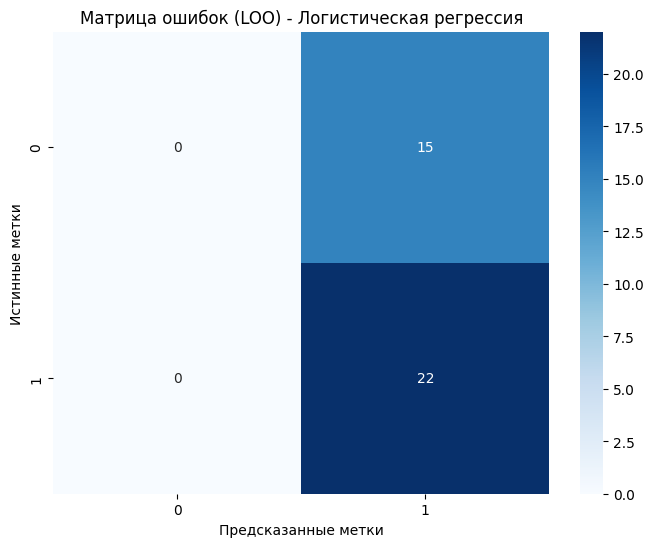


Оценка модели: Random Forest
LOO Результаты для Random Forest:
Точность (Accuracy): 0.9459
F1-score: 0.9565
ROC AUC: 0.9939


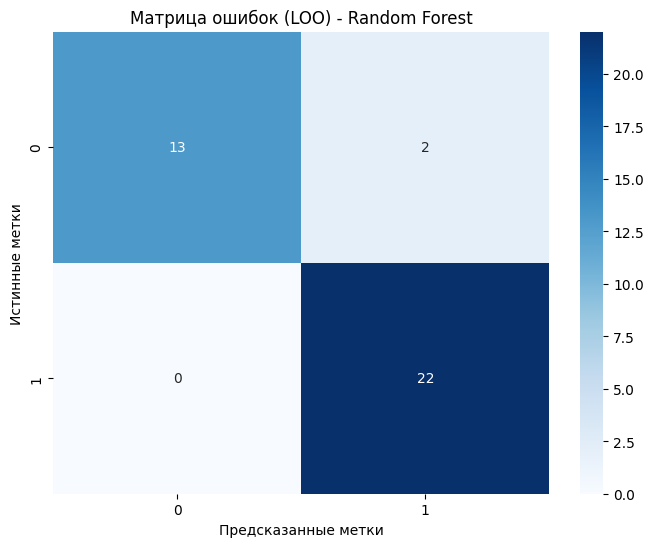


Оценка модели: XGBoost
LOO Результаты для XGBoost:
Точность (Accuracy): 0.8649
F1-score: 0.8980
ROC AUC: 0.9606


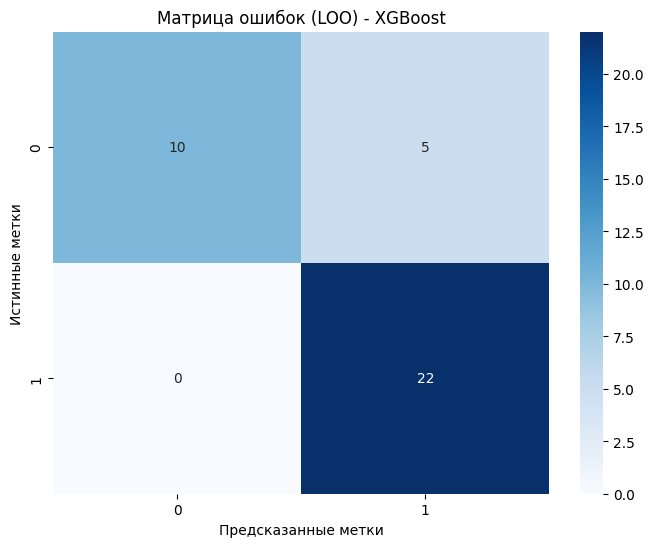


Оценка модели: SVM
LOO Результаты для SVM:
Точность (Accuracy): 0.9189
F1-score: 0.9333
ROC AUC: 0.9545


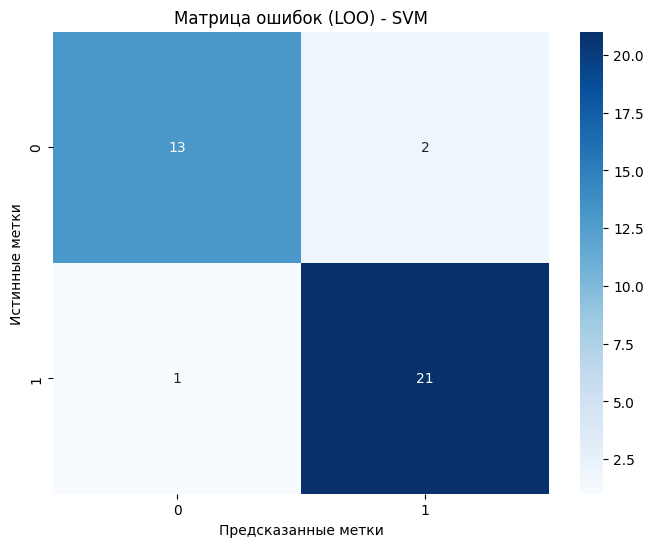


Оценка модели: Наивный Байес
LOO Результаты для Наивный Байес:
Точность (Accuracy): 0.8919
F1-score: 0.9000
ROC AUC: 0.9545


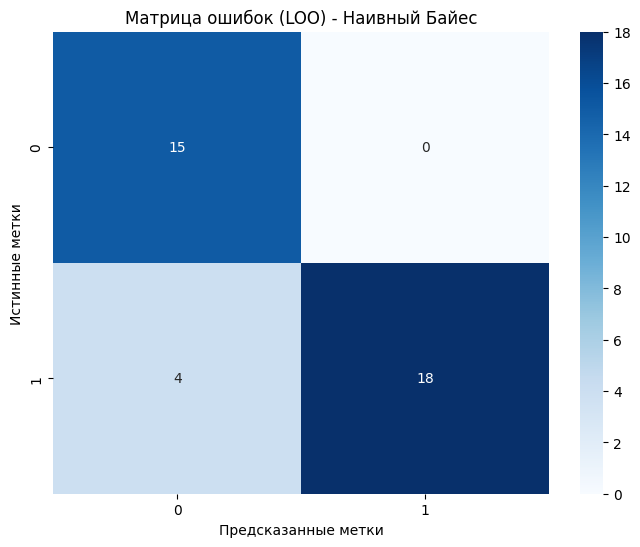


Создаем ансамбль моделей (стекинг)
Топ-3 модели для ансамбля: ['Random Forest', 'SVM', 'Наивный Байес']
LOO оценка для Stacking Ensemble
LOO Результаты для Stacking Ensemble:
Точность (Accuracy): 0.9459
F1-score: 0.9545
ROC AUC: 0.9848


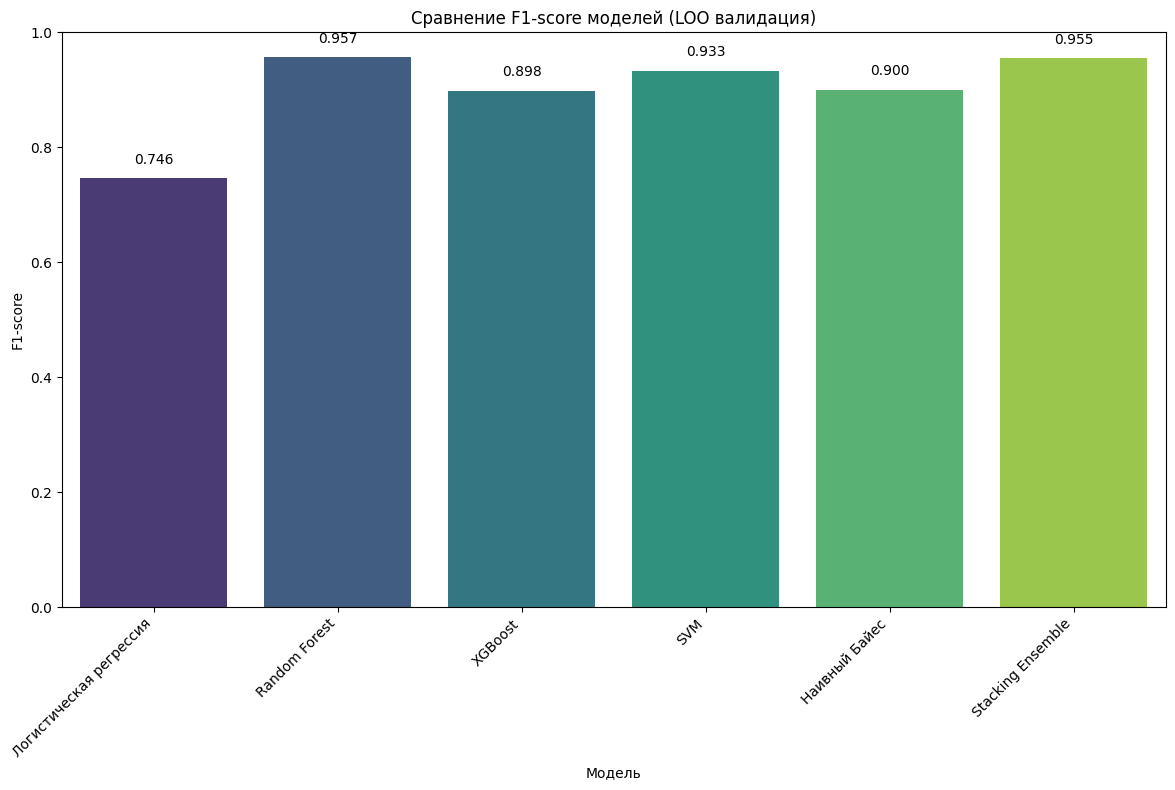


Лучшая модель: Random Forest
F1-score (LOO): 0.9565

Анализ важности признаков для лучшей модели


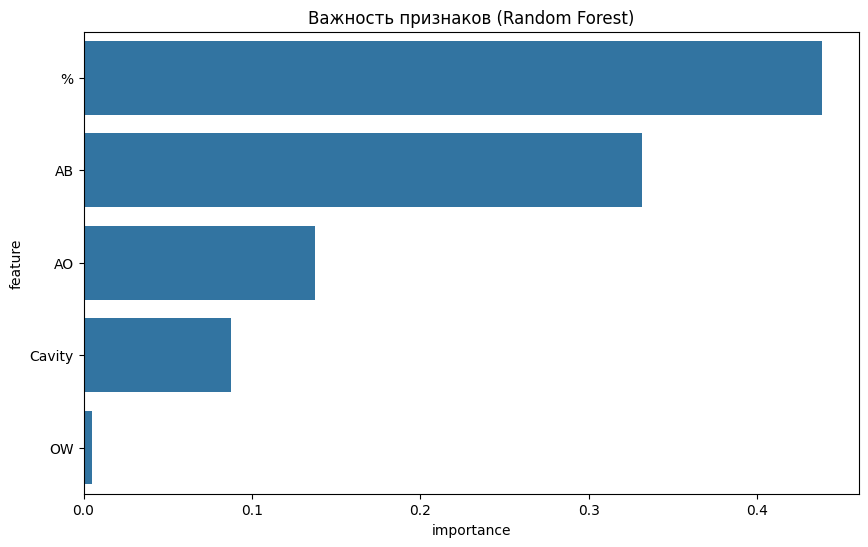


SHAP анализ для лучшей модели


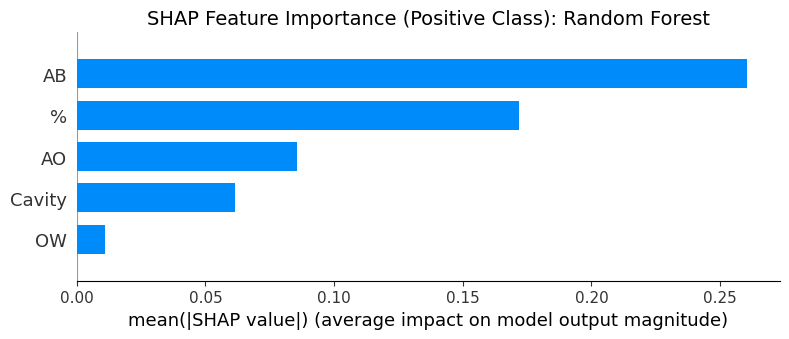

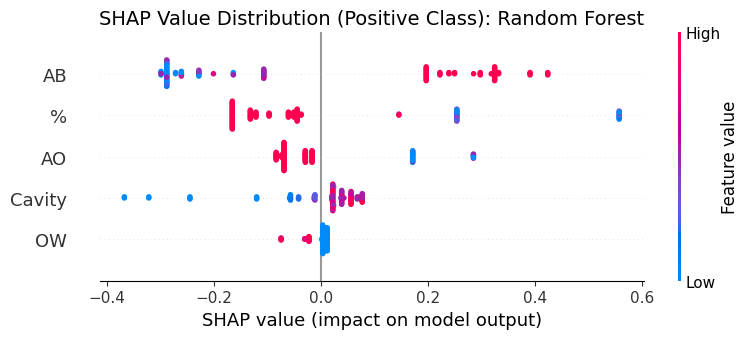

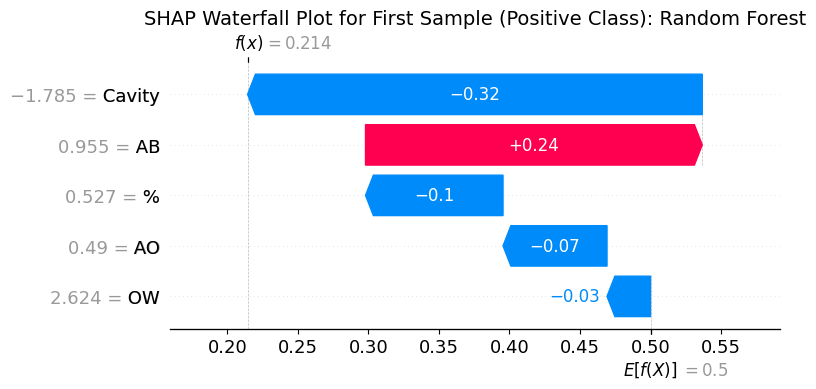

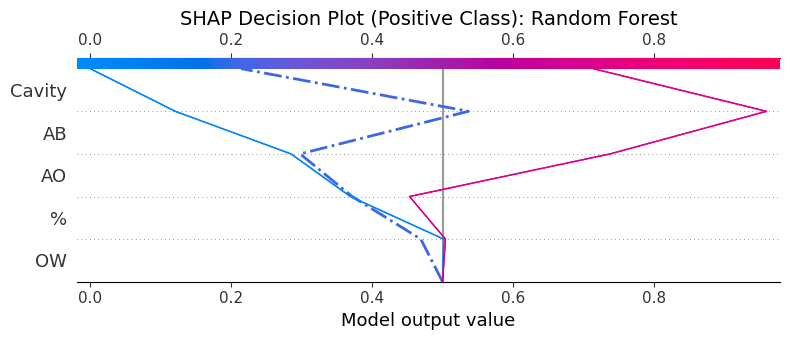

Лучшая модель: Random Forest
F1-score: 0.9565217391304348

Логистическая регрессия:
  F1: 0.7458, AUC: 0.7030

Random Forest:
  F1: 0.9565, AUC: 0.9939

XGBoost:
  F1: 0.8980, AUC: 0.9606

SVM:
  F1: 0.9333, AUC: 0.9545

Наивный Байес:
  F1: 0.9000, AUC: 0.9545

Stacking Ensemble:
  F1: 0.9545, AUC: 0.9848


In [ ]:

results = train_and_evaluate_models_loo(
    X,
    y,
    model_params,
    n_trials=30  # Количество испытаний для Optuna
)

# Доступ к результатам:
print("Лучшая модель:", results['best_model_name'])
print("F1-score:", results['loo_results'][results['best_model_name']]['f1'])

# Просмотр результатов для всех моделей
for model_name, metrics in results['loo_results'].items():
    print(f"\n{model_name}:")
    print(f"  F1: {metrics['f1']:.4f}, AUC: {metrics['auc']:.4f}")

In [ ]:
def train_and_evaluate_models_loo(X, y, model_params, cv=5, scoring='f1', n_trials=50):
    from sklearn.model_selection import LeaveOneOut
    from sklearn.base import clone
    import optuna
    from optuna.samplers import TPESampler
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix
    from imblearn.over_sampling import SMOTE
    from imblearn.pipeline import Pipeline as imPipeline
    import warnings
    from sklearn.model_selection import StratifiedKFold
    from optuna import Trial
    from optuna.pruners import MedianPruner
    from sklearn.inspection import permutation_importance

    # Настройка окружения
    optuna.logging.set_verbosity(optuna.logging.ERROR)
    warnings.filterwarnings('ignore')

    # Инициализация структур данных
    results = {}
    best_models = {}
    loo_results = {}
    feature_importances = {}
    feature_names = X.columns.tolist()

    # Конфигурация LOO
    loo = LeaveOneOut()
    n_samples = X.shape[0]

    print(f"Начало LOO-валидации ({n_samples} итераций)")

    # 1. Оптимизация моделей с Optuna
    for model_name, model_info in model_params.items():
        print(f"\n{'='*50}")
        print(f"Оптимизация модели: {model_name}")
        print(f"{'='*50}")

        # Создаем study для Optuna
        study = optuna.create_study(
            direction='maximize',
            sampler=TPESampler(seed=42),
            pruner=MedianPruner(n_warmup_steps=5)
        )

        # Функция objective для Optuna
        def objective(trial, pipeline, param_grid, X, y):
            params = {}
            for param_name, param_spec in param_grid.items():
                param_type = param_spec['type']

                if param_type == 'int':
                    params[param_name] = trial.suggest_int(
                        param_name,
                        low=param_spec['low'],
                        high=param_spec['high']
                    )
                elif param_type == 'float':
                    log = param_spec.get('log', False)
                    params[param_name] = trial.suggest_float(
                        param_name,
                        low=param_spec['low'],
                        high=param_spec['high'],
                        log=log
                    )
                elif param_type == 'categorical':
                    params[param_name] = trial.suggest_categorical(
                        param_name,
                        choices=param_spec['values']
                    )

            model = clone(pipeline).set_params(**params)

            # LOO кросс-валидация
            f1_scores = []
            for train_index, test_index in loo.split(X):
                X_train, X_test = X.iloc[train_index], X.iloc[test_index]
                y_train, y_test = y.iloc[train_index], y.iloc[test_index]

                # Применяем SMOTE только к тренировочным данным
                over = SMOTE(sampling_strategy={0: 50, 1: 50}, random_state=42)
                X_res, y_res = over.fit_resample(X_train, y_train)

                model.fit(X_res, y_res)
                y_pred = model.predict(X_test)
                f1_scores.append(f1_score(y_test, y_pred))

            return np.mean(f1_scores)

        # Запуск оптимизации
        study.optimize(
            lambda trial: objective(trial, model_info['pipeline'], model_info['params'], X, y),
            n_trials=n_trials,
            show_progress_bar=True
        )

        # Сохраняем лучшие параметры
        best_params = study.best_params
        best_model = model_info['pipeline'].set_params(**best_params)
        best_models[model_name] = best_model
        results[model_name] = {
            'best_params': best_params,
            'best_score': study.best_value
        }

        print(f"Лучшие параметры для {model_name}:")
        for param, value in best_params.items():
            print(f"{param}: {value}")
        print(f"Лучший {scoring}-score: {study.best_value:.4f}")

    # 2. LOO-оценка для всех моделей
    print("\n\n{'='*50}")
    print("Финальная LOO-оценка моделей")
    print("{'='*50}")

    for model_name, model in best_models.items():
        print(f"\nОценка модели: {model_name}")

        y_true_list = []
        y_pred_list = []
        y_prob_list = []

        for train_index, test_index in loo.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            # Балансировка классов только в тренировочных данных
            over = SMOTE(sampling_strategy={0: 50, 1: 50}, random_state=42)
            X_res, y_res = over.fit_resample(X_train, y_train)

            model_clone = clone(model)
            model_clone.fit(X_res, y_res)

            y_pred = model_clone.predict(X_test)
            if hasattr(model_clone, 'predict_proba'):
                y_prob = model_clone.predict_proba(X_test)[:, 1]
            else:
                # Для моделей без predict_proba используем decision_function
                y_prob = model_clone.decision_function(X_test)
                # Масштабируем к [0, 1]
                y_prob = (y_prob - y_prob.min()) / (y_prob.max() - y_prob.min())

            y_true_list.append(y_test.values[0])
            y_pred_list.append(y_pred[0])
            y_prob_list.append(y_prob[0])

        # Вычисление метрик
        accuracy = accuracy_score(y_true_list, y_pred_list)
        f1 = f1_score(y_true_list, y_pred_list)
        auc = roc_auc_score(y_true_list, y_prob_list)

        loo_results[model_name] = {
            'accuracy': accuracy,
            'f1': f1,
            'auc': auc,
            'y_true': y_true_list,
            'y_pred': y_pred_list,
            'y_prob': y_prob_list
        }

        print(f"LOO Результаты для {model_name}:")
        print(f"Точность (Accuracy): {accuracy:.4f}")
        print(f"F1-score: {f1:.4f}")
        print(f"ROC AUC: {auc:.4f}")

        # Матрица ошибок
        cm = confusion_matrix(y_true_list, y_pred_list)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Матрица ошибок (LOO) - {model_name}')
        plt.xlabel('Предсказанные метки')
        plt.ylabel('Истинные метки')
        plt.show()

    # 3. Создание и оценка ансамбля
    print("\nСоздаем ансамбль моделей (стекинг)")

    # Выбираем топ-3 модели по LOO F1-score
    top_models = sorted(
        [(name, loo_results[name]['f1']) for name in best_models.keys()],
        key=lambda x: x[1],
        reverse=True
    )[:3]
    top_model_names = [model[0] for model in top_models]
    print(f"Топ-3 модели для ансамбля: {top_model_names}")

    # LOO для ансамбля
    print("LOO оценка для Stacking Ensemble")

    y_true_list = []
    y_pred_list = []
    y_prob_list = []

    for train_index, test_index in loo.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Балансировка классов
        over = SMOTE(sampling_strategy={0: 50, 1: 50}, random_state=42)
        X_res, y_res = over.fit_resample(X_train, y_train)

        # Обучаем базовые модели
        base_models = []
        for name in top_model_names:
            model_clone = clone(best_models[name])
            model_clone.fit(X_res, y_res)
            base_models.append((name, model_clone))

        # Создаем и обучаем ансамбль
        stacking = StackingClassifier(
            estimators=base_models,
            final_estimator=LogisticRegression(),
            cv=5,
            stack_method='predict_proba'
        )
        stacking.fit(X_res, y_res)

        # Предсказание
        y_pred = stacking.predict(X_test)
        y_prob = stacking.predict_proba(X_test)[:, 1]

        y_true_list.append(y_test.values[0])
        y_pred_list.append(y_pred[0])
        y_prob_list.append(y_prob[0])

    # Вычисление метрик для ансамбля
    accuracy = accuracy_score(y_true_list, y_pred_list)
    f1 = f1_score(y_true_list, y_pred_list)
    auc = roc_auc_score(y_true_list, y_prob_list)

    loo_results['Stacking Ensemble'] = {
        'accuracy': accuracy,
        'f1': f1,
        'auc': auc,
        'y_true': y_true_list,
        'y_pred': y_pred_list,
        'y_prob': y_prob_list
    }

    print("LOO Результаты для Stacking Ensemble:")
    print(f"Точность (Accuracy): {accuracy:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC AUC: {auc:.4f}")

    # 4. Визуализация результатов
    model_names = list(loo_results.keys())
    f1_scores = [loo_results[model]['f1'] for model in model_names]

    plt.figure(figsize=(12, 8))
    ax = sns.barplot(x=model_names, y=f1_scores, palette='viridis')
    plt.title('Сравнение F1-score моделей (LOO валидация)')
    plt.xlabel('Модель')
    plt.ylabel('F1-score')
    plt.ylim(0, 1.0)
    plt.xticks(rotation=45, ha='right')

    for i, score in enumerate(f1_scores):
        ax.text(i, score + 0.02, f'{score:.3f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

    # 5. Выбор лучшей модели
    best_model_name = max(loo_results.items(), key=lambda x: x[1]['f1'])[0]
    best_model = best_models.get(best_model_name, None)

    print(f"\n{'='*50}")
    print(f"Лучшая модель: {best_model_name}")
    print(f"F1-score (LOO): {loo_results[best_model_name]['f1']:.4f}")
    print(f"{'='*50}")

    # 6. Анализ важности признаков для лучшей модели
    if best_model:
        print("\nАнализ важности признаков для лучшей модели")

        # Обучаем на полном датасете с балансировкой
        over = SMOTE(sampling_strategy={0: 50, 1: 50}, random_state=42)
        X_res, y_res = over.fit_resample(X, y)
        best_model.fit(X_res, y_res)

        # Извлекаем классификатор
        classifier = best_model.named_steps['classifier'] if hasattr(best_model, 'named_steps') else best_model

        # Анализ важности признаков
        if hasattr(classifier, 'feature_importances_'):
            importances = pd.DataFrame({
                'feature': feature_names,
                'importance': classifier.feature_importances_
            }).sort_values('importance', ascending=False)

            plt.figure(figsize=(10, 6))
            sns.barplot(x='importance', y='feature', data=importances.head(10))
            plt.title(f'Важность признаков ({best_model_name})')
            plt.show()

        elif hasattr(classifier, 'coef_'):
            coef = classifier.coef_[0]
            importances = pd.DataFrame({
                'feature': feature_names,
                'importance': np.abs(coef)
            }).sort_values('importance', ascending=False)

            plt.figure(figsize=(10, 6))
            sns.barplot(x='importance', y='feature', data=importances.head(10))
            plt.title(f'Коэффициенты признаков ({best_model_name})')
            plt.show()


        print("\nSHAP анализ для лучшей модели")

        # Обработка pipeline
        if hasattr(best_model, 'named_steps'):
            classifier = best_model.named_steps['classifier']
            preprocessor = Pipeline(best_model.steps[:-1])
            try:
                feature_names_out = preprocessor.get_feature_names_out()
            except:
                feature_names_out = X_res.columns.tolist()

            X_processed = preprocessor.transform(X_res)
            X_processed = pd.DataFrame(X_processed, columns=feature_names_out)

            if hasattr(classifier, 'predict_proba'):
                explainer = shap.Explainer(classifier, X_processed)
                shap_values = explainer(X_processed)
            else:
                explainer = shap.Explainer(classifier, X_processed, output='raw')
                shap_values = explainer(X_processed)
        else:
            classifier = best_model
            X_processed = X_res
            feature_names_out = X_res.columns.tolist()

            if hasattr(classifier, 'predict_proba'):
                explainer = shap.Explainer(classifier, X_processed)
                shap_values = explainer(X_processed)
            else:
                explainer = shap.Explainer(classifier, X_processed, output='raw')
                shap_values = explainer(X_processed)

        # Обработка бинарной классификации
        if len(shap_values.shape) == 3 and shap_values.shape[-1] == 2:
            # Для бинарной классификации используем только значения для положительного класса
            shap_values_positive = shap_values[..., 1]
            expected_value_positive = explainer.expected_value[1]
        else:
            shap_values_positive = shap_values
            expected_value_positive = explainer.expected_value

        # Ограничиваем выборку для визуализации
        if X_processed.shape[0] > 100:
            sample_indices = np.random.choice(X_processed.shape[0], 100, replace=False)
            shap_values_sample = shap_values_positive[sample_indices]
            X_sample = X_processed.iloc[sample_indices]
        else:
            shap_values_sample = shap_values_positive
            X_sample = X_processed



        # Визуализация 1: Summary Plot (глобальная интерпретация)
        plt.figure(figsize=(12, 8))
        shap.summary_plot(shap_values_positive, X_processed, plot_type="bar", show=False)
        plt.title(f"SHAP Feature Importance (Positive Class): {best_model_name}", fontsize=14)
        plt.tight_layout()
        plt.show()

        # Визуализация 2: Beeswarm Plot
        plt.figure(figsize=(12, 8))
        shap.summary_plot(shap_values_positive, X_processed, show=False)
        plt.title(f"SHAP Value Distribution (Positive Class): {best_model_name}", fontsize=14)
        plt.tight_layout()
        plt.show()
        # Визуализация 3: Waterfall Plot
        try:
            # Создаем отдельную фигуру
            plt.figure(figsize=(12, 6))

            # Для waterfall plot используем только положительный класс
            if len(shap_values.shape) == 3 and shap_values.shape[-1] == 2:
                # Для бинарной классификации
                shap.plots.waterfall(shap_values[0, :, 1], max_display=15, show=False)
            else:
                # Для регрессии или мультикласса
                shap.plots.waterfall(shap_values[0], max_display=15, show=False)

            plt.title(f"SHAP Waterfall Plot for First Sample (Positive Class): {best_model_name}", fontsize=14)
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"Ошибка при создании waterfall plot: {str(e)}")

        # Визуализация 4: Decision Plot
        try:
            plt.figure(figsize=(12, 8))
            shap.decision_plot(
                expected_value_positive,
                shap_values_sample.values[:5] if hasattr(shap_values_sample, 'values') else shap_values_sample[:5],
                feature_names=feature_names_out,
                highlight=0,
                show=False
            )
            plt.title(f"SHAP Decision Plot (Positive Class): {best_model_name}", fontsize=14)
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"Ошибка при создании decision plot: {str(e)}")



    return {
        'best_model': best_model,
        'best_model_name': best_model_name,
        'loo_results': loo_results,
        'cv_results': results,
        'feature_importances': feature_importances
    }

In [4]:
# Исправление метаданных виджетов
import json
from google.colab import files

# Скачиваем ноутбук
files.download('microgels_classification.ipynb')

# Читаем и исправляем файл
with open('microgels_classification.ipynb', 'r', encoding='utf-8') as f:
    nb = json.load(f)

if 'metadata' in nb and 'widgets' in nb['metadata']:
    # Удаляем проблемные метаданные
    del nb['metadata']['widgets']

    # Сохраняем исправленную версию
    with open('microgels_classification_fixed.ipynb', 'w', encoding='utf-8') as f:
        json.dump(nb, f, indent=2, ensure_ascii=False)
        f.write('\n')

    # Скачиваем исправленную версию
    files.download('microgels_classification_fixed.ipynb')
    print("Исправленная версия ноутбука скачана!")
else:
    print("Проблемные метаданные не найдены")

FileNotFoundError: Cannot find file: microgels_classification.ipynb